In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('tabular/tracks.csv', skipinitialspace=True)

In [3]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0                 1       290479     False          52             5   
1                 1       539229     False          45             5   
2                 1       264200     False          39             5   
3                 1       387413     False           0             6   
4                 1       248956     False           0             1   
...             ...          ...       ...         ...           ...   
109542            1       209655      True          23             2   
109543            1       205724      True          56             1   
109544            1       195853      True          80             3   
109545            1       208698     False          60             1   
109546            1       202826     False          57             5   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... features_duration_ms  \
0                                 1989  ...               290479   
1                              Kiasmos  ...               539229   
2                        Night Visions  ...               264200   
3                   Confronted Remixes  ...               387414   
4                    10 Years Diynamic  ...               248957   
...                                ...  ...                  ...   
109542  I'm Good (Blue) [REAPER Remix]  ...               209655   
109543                End Of The Night  ...               205724   
109544                   One More Love  ...               195853   
109545                        Savannah  ...               208698   
109546                  Champagne Talk  ...               202826   

       time_signature  start_of_fade_out  tempo_confidence  \
0                   3          275.90530             0.020   
1                   4          517.28253             0.678   
2                   3          259.04180             0.847   
3                   4          387.41360             0.882   
4                   4          239.63574             0.882   
...               ...                ...               ...   
109542              4          200.10376             0.729   
109543              4          200.98611             0.712   
109544              4          189.48643             0.814   
109545              4          197.41605             0.650   
109546              4          196.73688             0.428   

   

In [4]:
df_copia=df.drop('id', axis=1)

In [5]:
df_copia

name  disc_number  duration_ms  \
0                                             Grey            1       290479   
1                                           Thrown            1       539229   
2                                          Routine            1       264200   
3       Confronted - Anfisa Letyago Stranger Remix            1       387413   
4                                  Jupiter Sunrise            1       248956   
...                                            ...          ...          ...   
109542     I'm Good (Blue) - REAPER Extended Remix            1       209655   
109543                            End Of The Night            1       205724   
109544                     Sexy Bitch (feat. Akon)            1       195853   
109545                                    Savannah            1       208698   
109546                                      Dejalo            1       202826   

        explicit  popularity  track_number                         artists  \
0          False          52             5                          Kölsch   
1          False          45             5                         Kiasmos   
2          False          39             5                 Joris Delacroix   
3          False           0             6          Pan-Pot;Anfisa Letyago   
4          False           0             1           Kollektiv Turmstrasse   
...          ...         ...           ...                             ...   
109542      True          23             2  David Guetta;Bebe Rexha;REAPER   
109543      True          56             1                     Danny Avila   
109544      True          80             3               David Guetta;Akon   
109545     False          60             1              Diviners;Philly K.   
109546     False          57             5                            King   

         album_type                      album_name album_release_date  ...  \
0             album                            1989         2017-09-22  ...   
1             album                         Kiasmos         2014-10-27  ...   
2             album                   Night Visions         2018-06-22  ...   
3            single              Confronted Remixes         2019-12-06  ...   
4       compilation               10 Years Diynamic         2016-09-16  ...   
...             ...                             ...                ...  ...   
109542       single  I'm Good (Blue) [REAPER Remix]         2022-10-21  ...   
109543       single                End Of The Night         2018-11-16  ...   
109544        album                   One More Love         2010-11-22  ...   
109545       single                        Savannah         2015-11-25  ...   
109546        album                  Champagne Talk         2022-10-12  ...   

       features_duration_ms  time_signature  start_of_fade_out  \
0                    290479               3          275.90530   
1                    539229               4          517.28253   
2                    264200               3          259.04180   
3                    387414               4          387.41360   
4                    248957               4          239.63574   
...                     ...             ...                ...   
109542               209655               4          200.10376   
109543               205724               4          200.98611   
109544               195853               4          189.48643   
109545               208698               4          197.41605   
109546               202826               4          196.73688   

        tempo_confidence  time_signature_confidence  key_confidence  \
0                  0.020                      1.000           0.500   
1                  0.678                      0.326           0.410   
2                  0.847                      0.457           0.904   
3                  0.882                      0.498           0.512   
4                  0.882                      1.000

In [6]:
df.dtypes

id                               object
name                             object
disc_number                       int64
duration_ms                       int64
explicit                           bool
popularity                        int64
track_number                      int64
artists                          object
album_type                       object
album_name                       object
album_release_date               object
album_release_date_precision     object
album_total_tracks                int64
danceability                    float64
energy                          float64
key                               int64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
features_duration_ms              int64


In [7]:
cosine_similarity_result = 1 - cosine(df_copia['duration_ms'], df_copia['features_duration_ms'])

In [8]:
cosine_similarity_result

0.999990157840035

In [9]:
cosine_similarity_result_2 = 1 - cosine(df_copia['n_bars'], df_copia['n_beats'])

In [10]:
cosine_similarity_result_2

0.9959996849133022

## Valori nulli

In [11]:
print(df_copia.isnull().any())

name                            False
disc_number                     False
duration_ms                     False
explicit                        False
popularity                      False
track_number                    False
artists                         False
album_type                      False
album_name                      False
album_release_date              False
album_release_date_precision    False
album_total_tracks              False
danceability                    False
energy                          False
key                             False
loudness                        False
mode                            False
speechiness                     False
acousticness                    False
instrumentalness                False
liveness                        False
valence                         False
tempo                           False
features_duration_ms            False
time_signature                  False
start_of_fade_out               False
tempo_confid

## Scatter plot

In [12]:
df_continui=df_copia[['duration_ms', 'popularity', 'danceability', 'energy', 'loudness','speechiness', 'acousticness',  
                    'instrumentalness', 'liveness', 'valence', 'tempo','start_of_fade_out', 'tempo_confidence', 
                     'time_signature_confidence', 'key_confidence', 'mode_confidence', 'n_beats' ]]

In [21]:
df_continui.columns

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'start_of_fade_out', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_beats'],
      dtype='object')

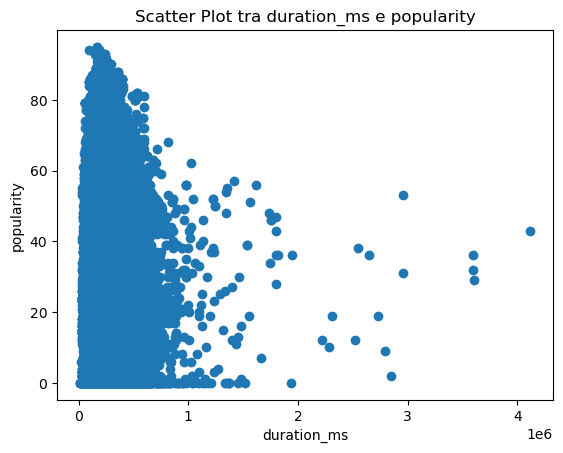

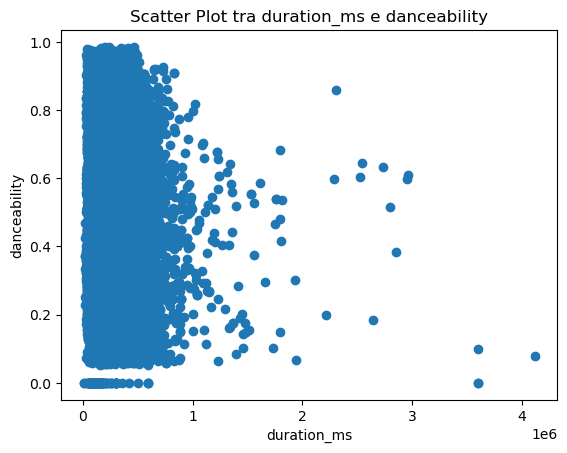

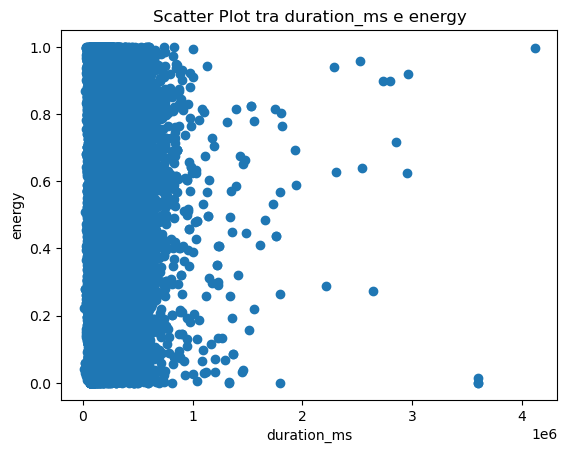

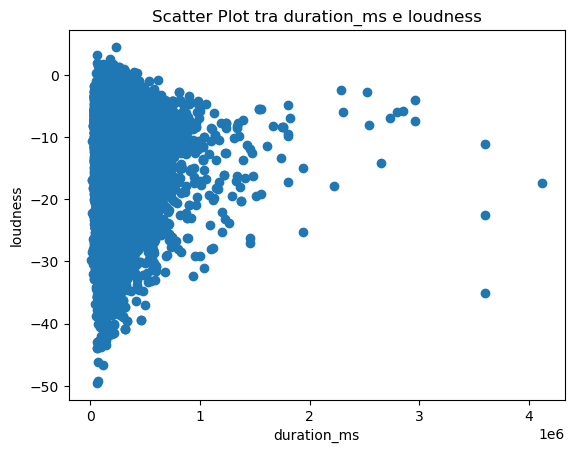

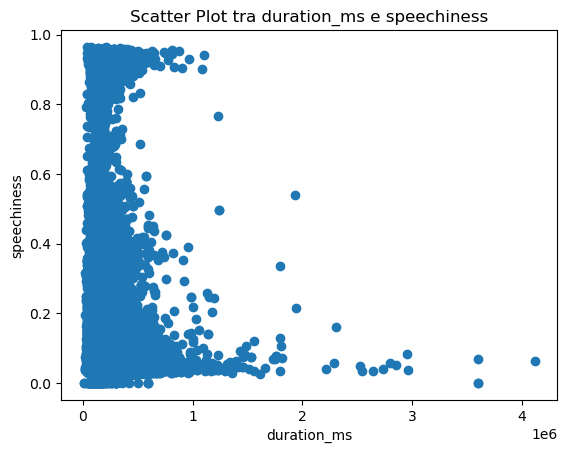

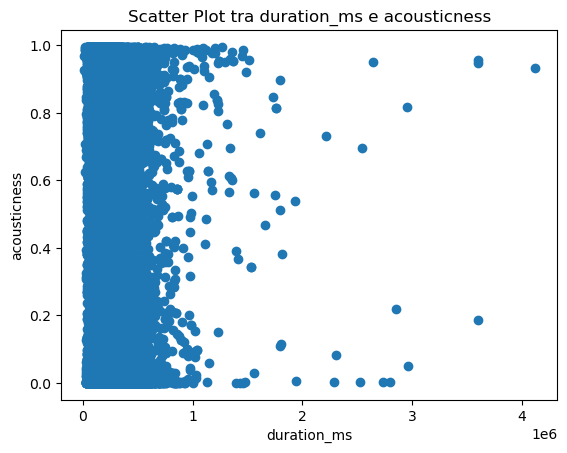

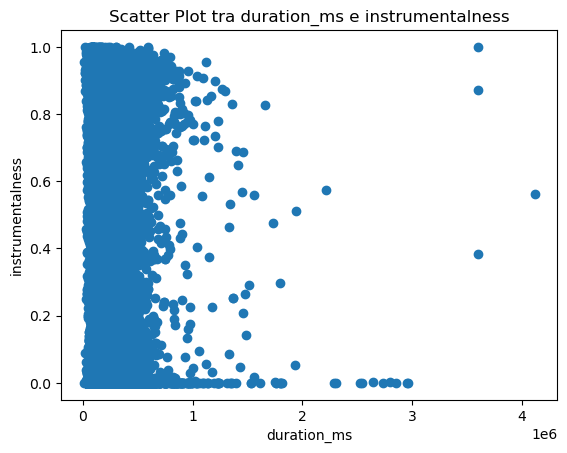

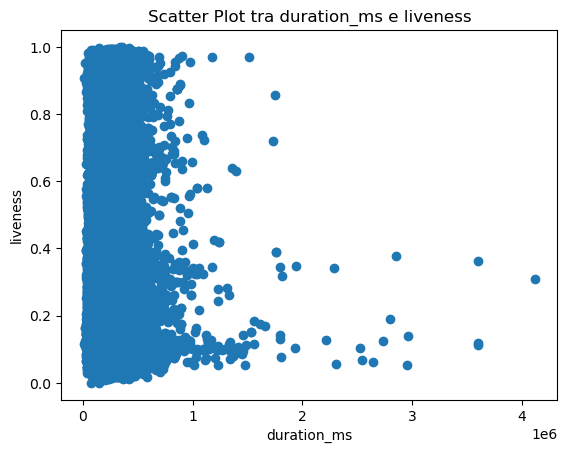

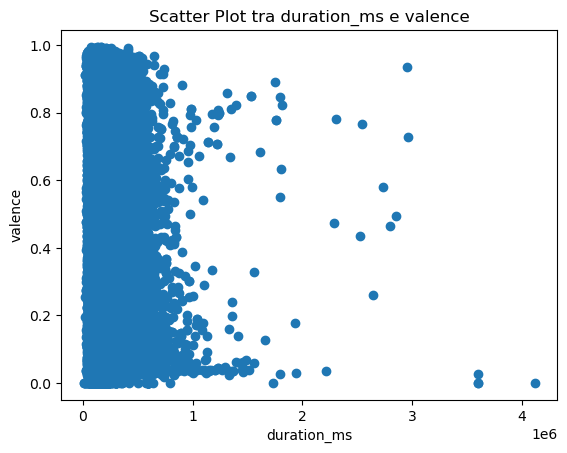

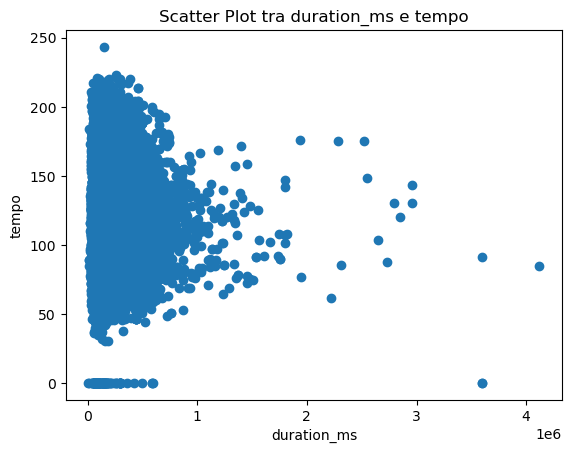

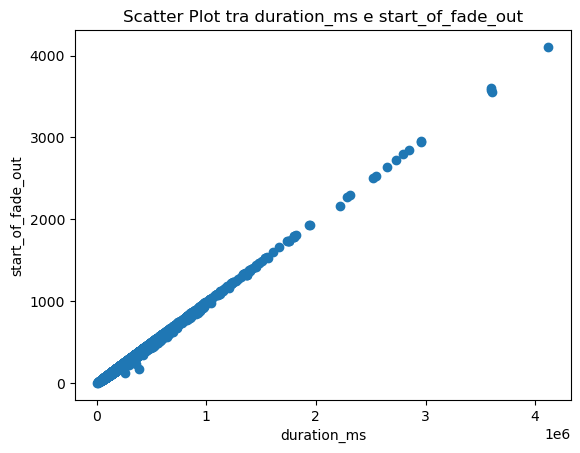

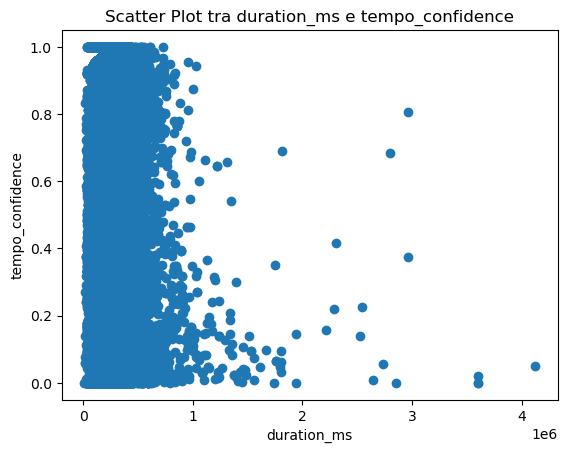

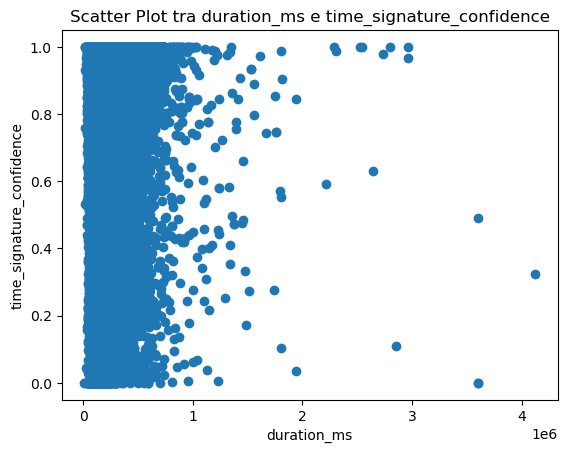

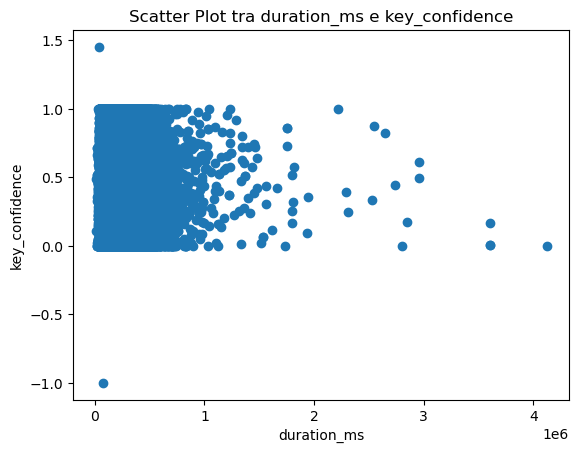

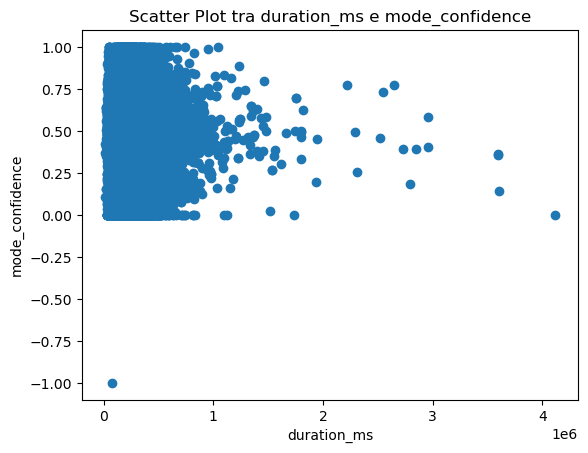

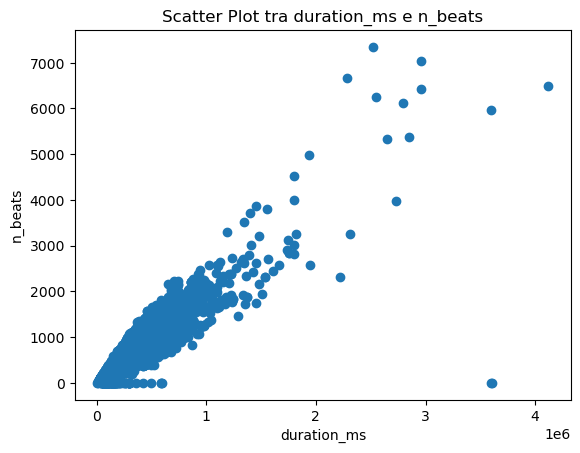

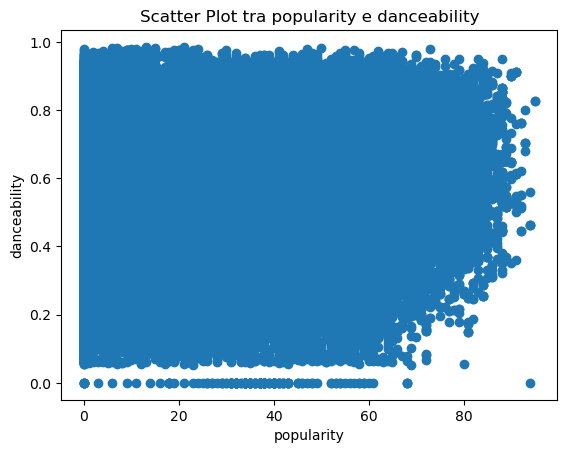

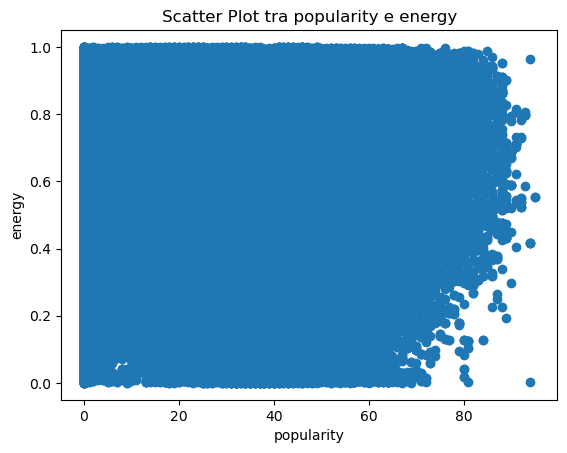

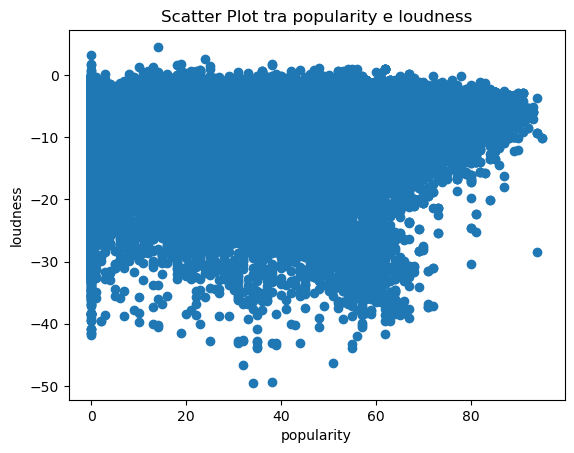

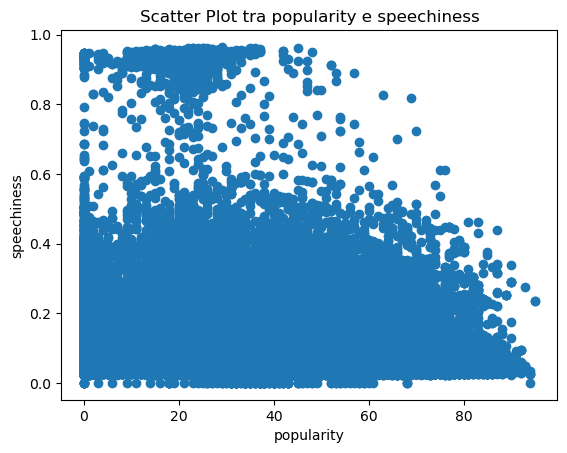

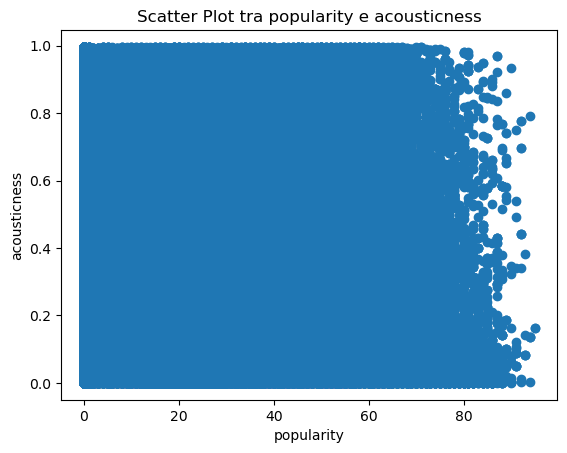

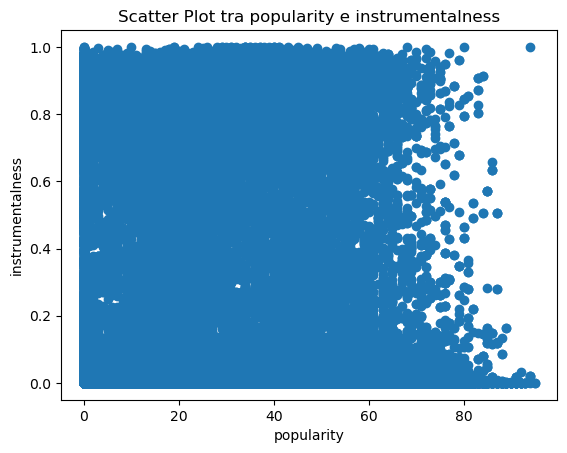

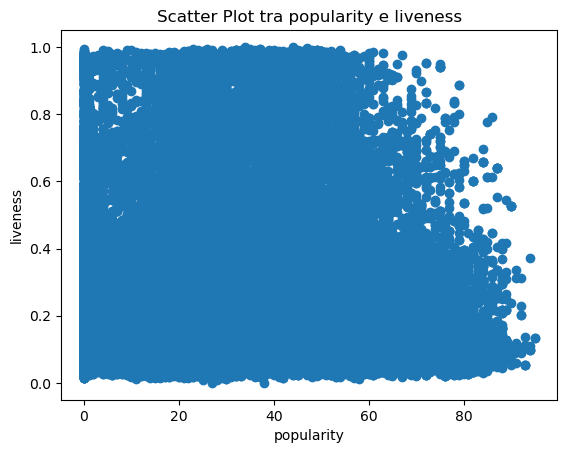

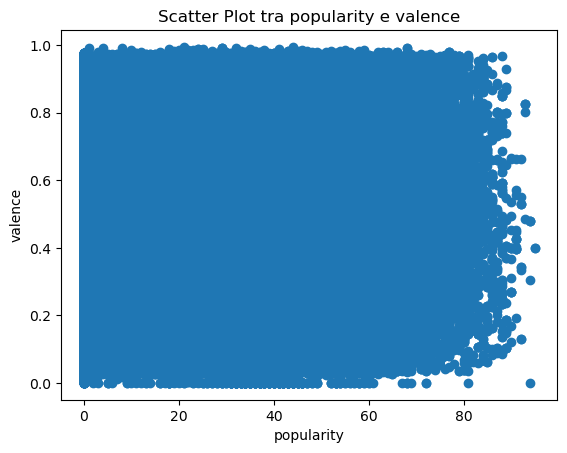

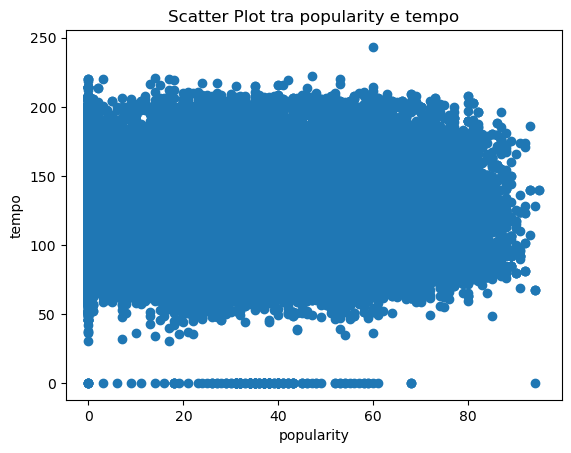

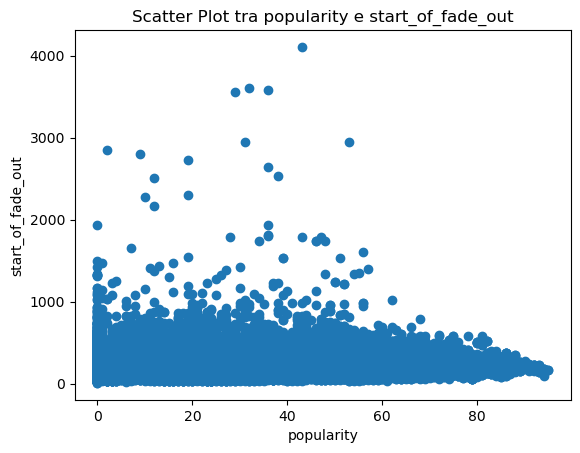

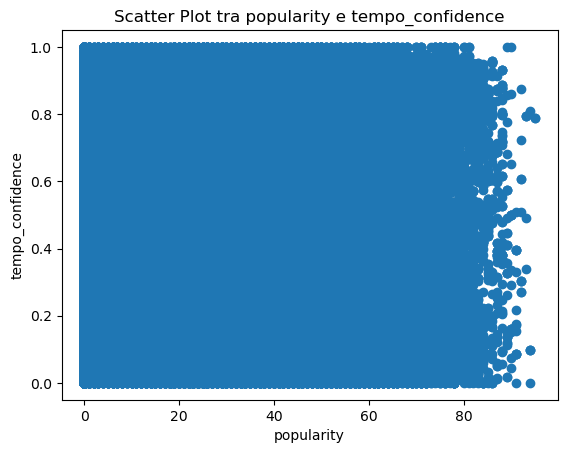

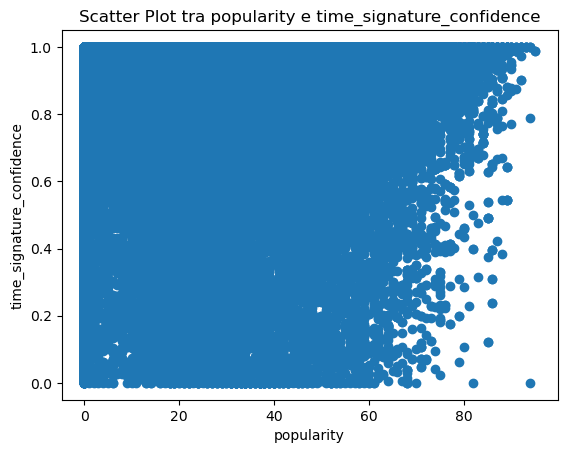

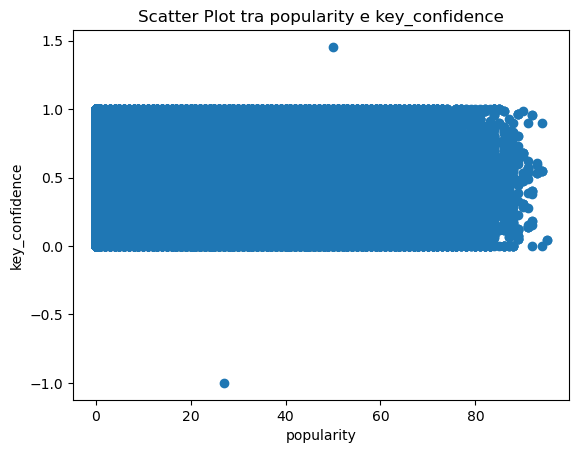

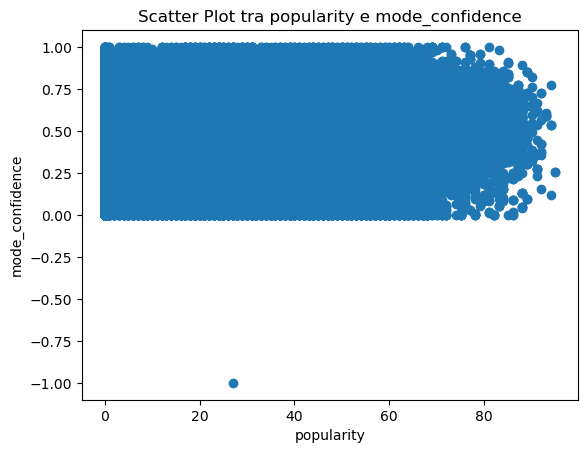

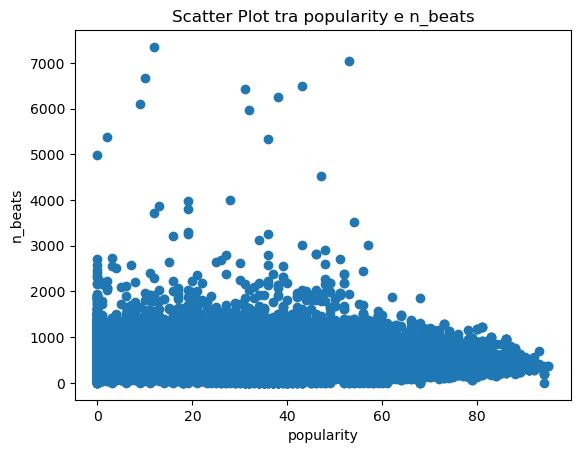

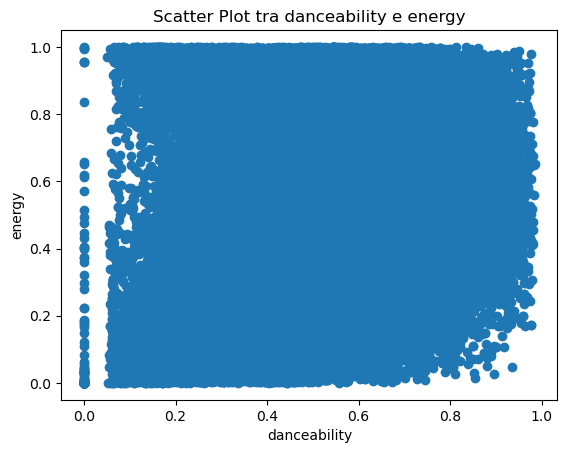

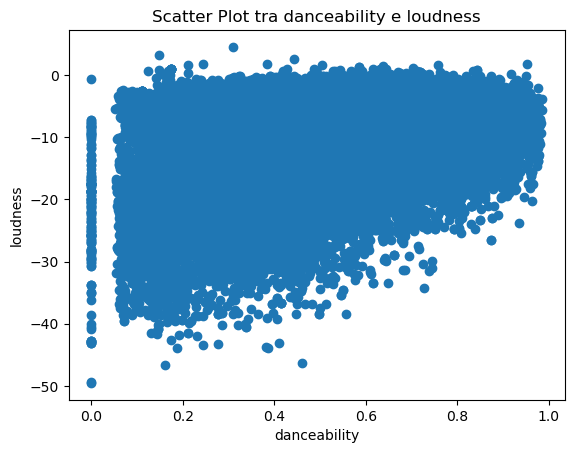

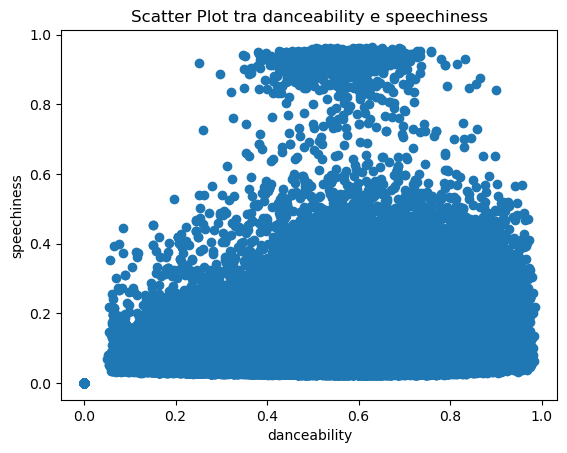

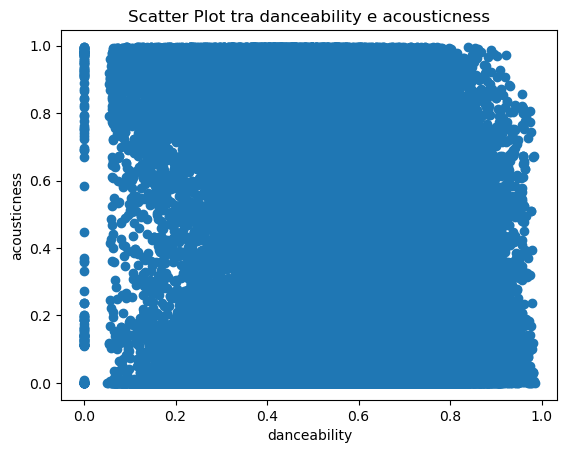

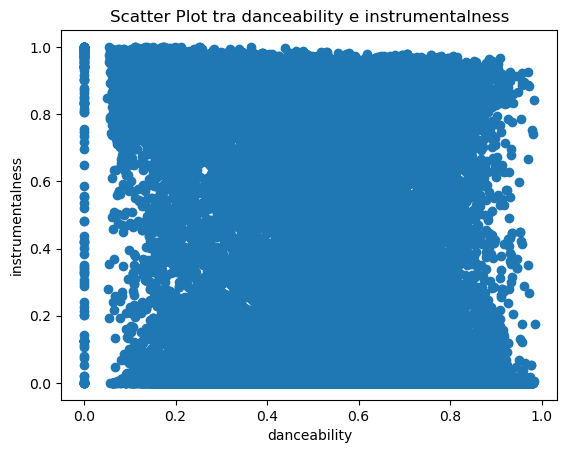

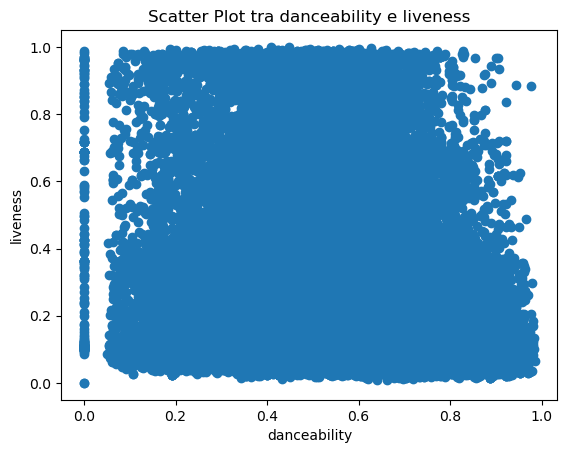

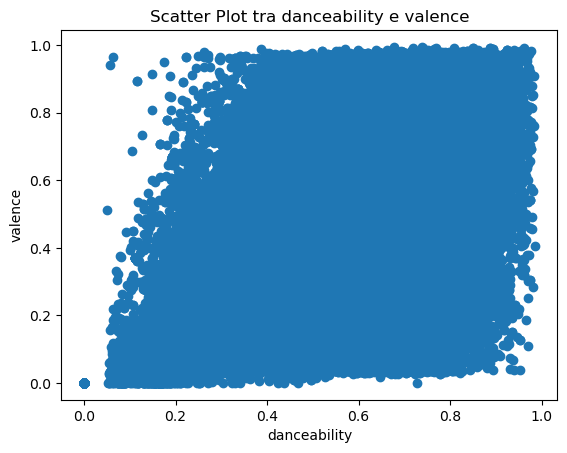

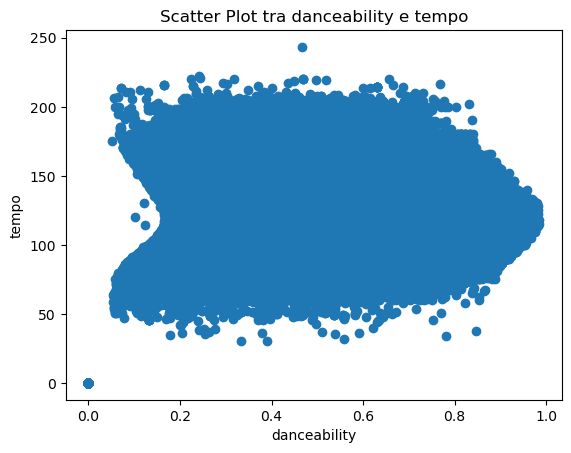

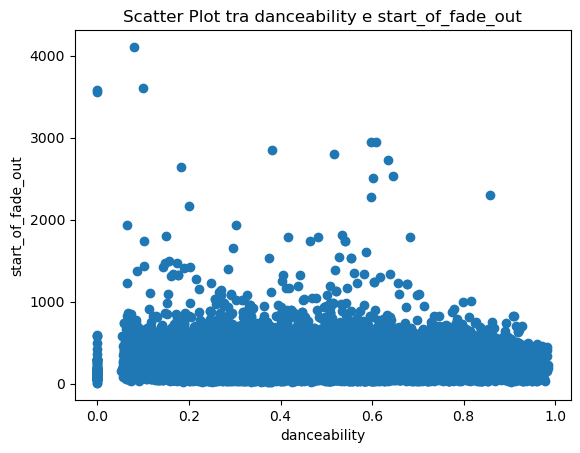

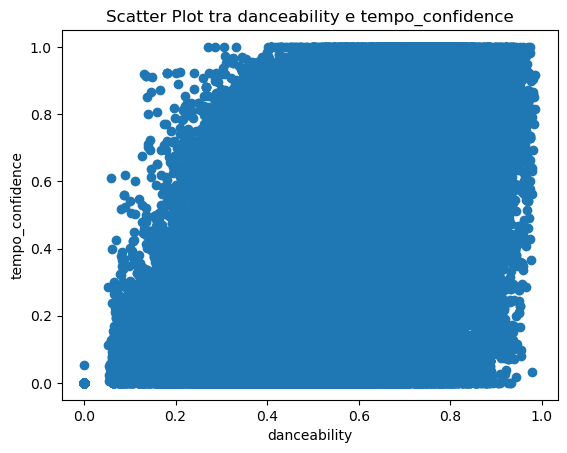

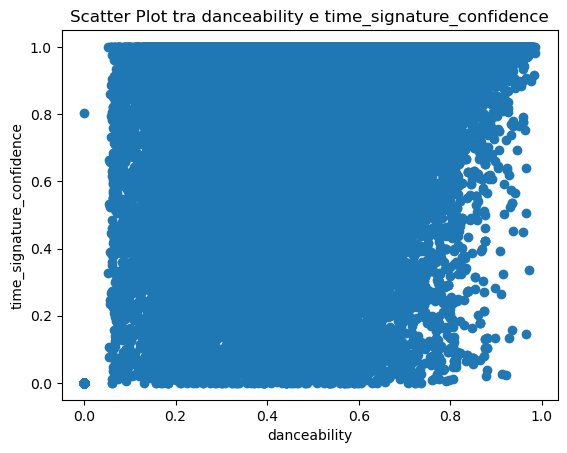

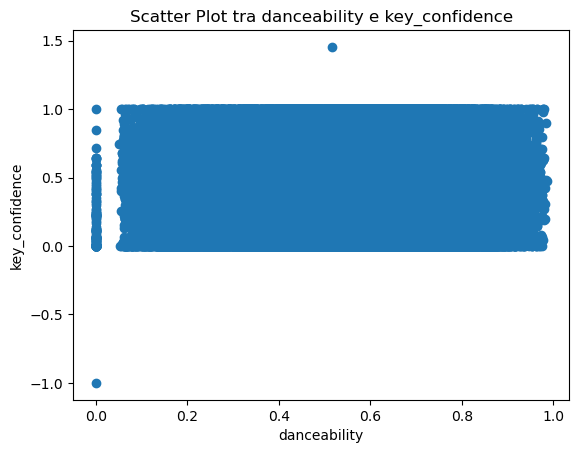

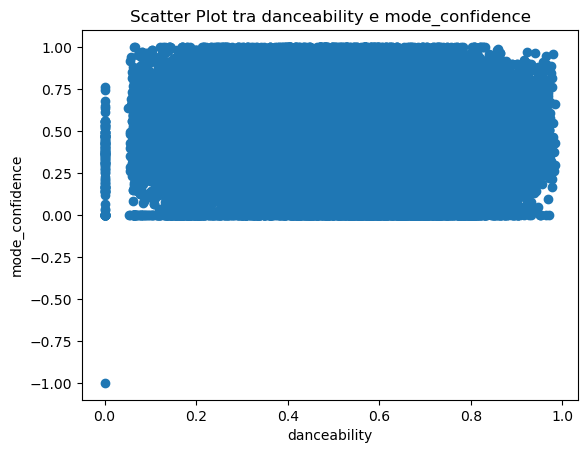

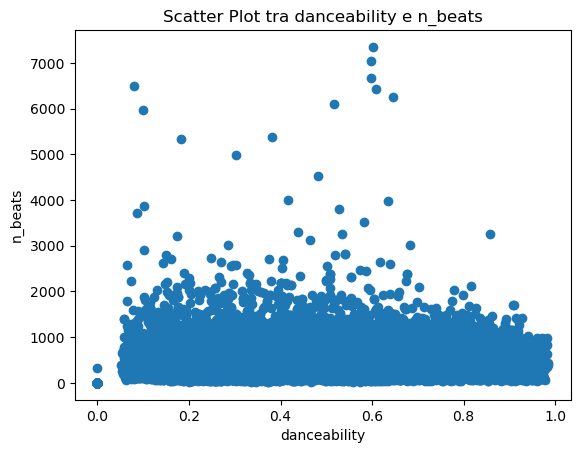

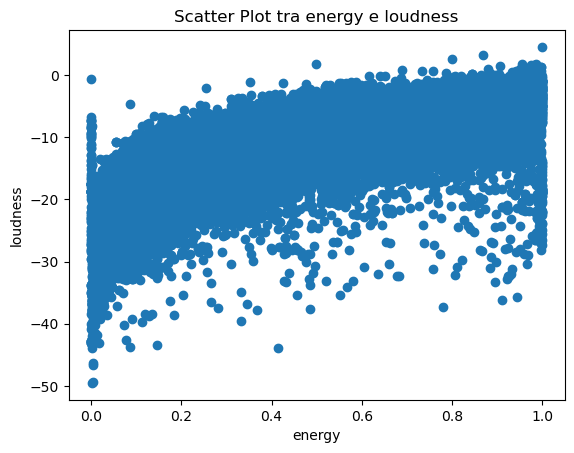

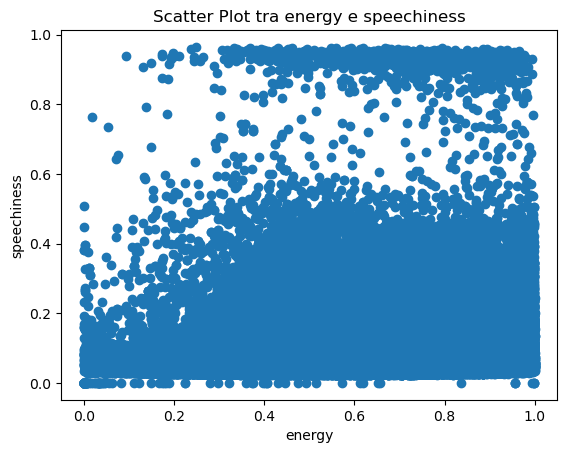

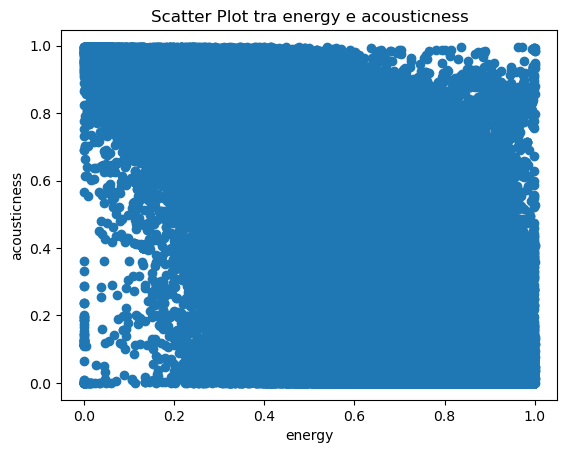

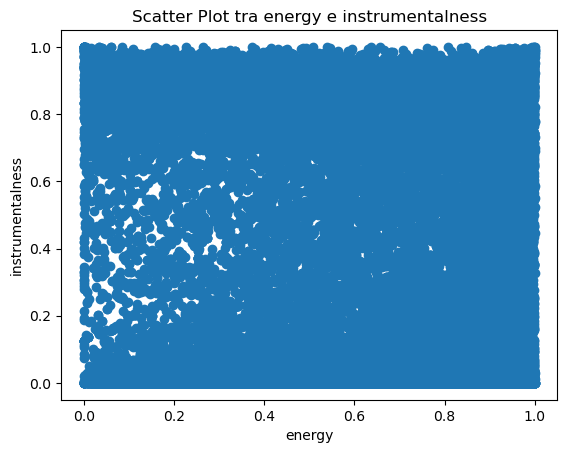

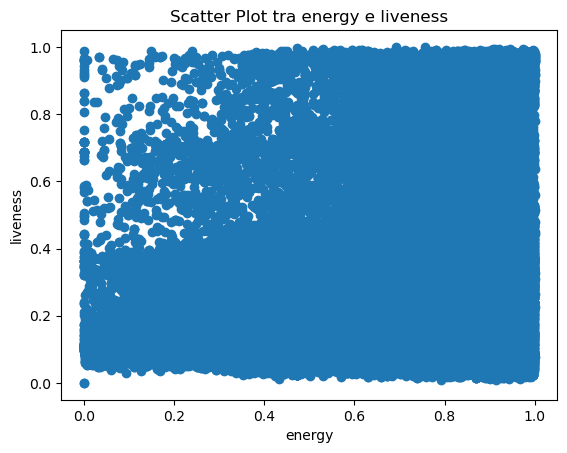

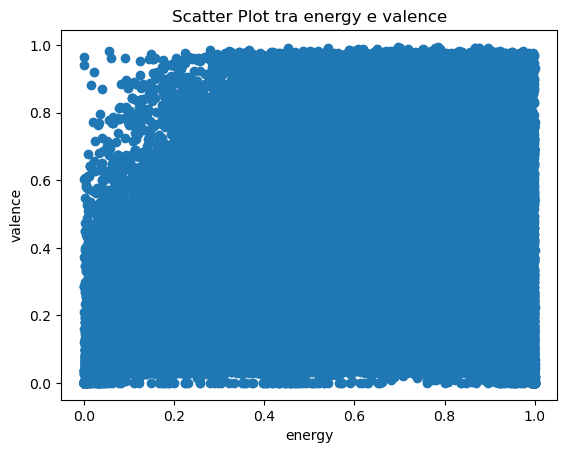

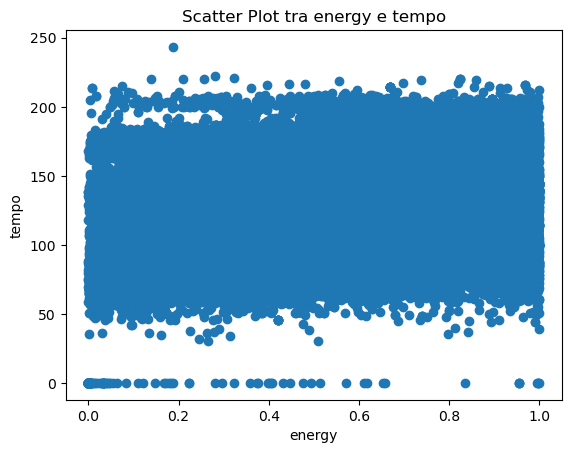

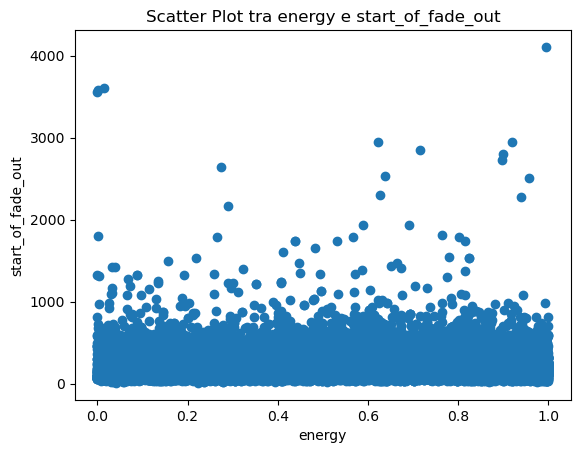

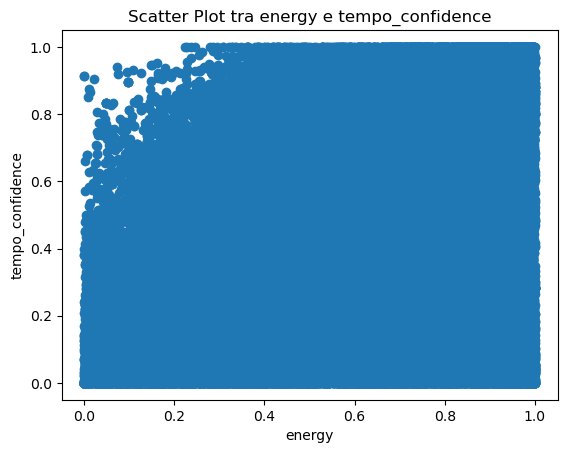

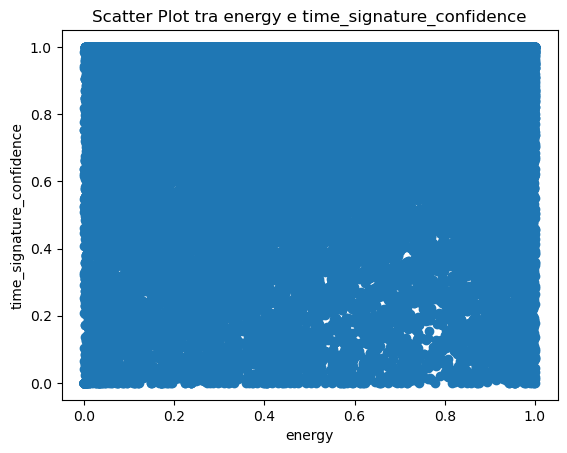

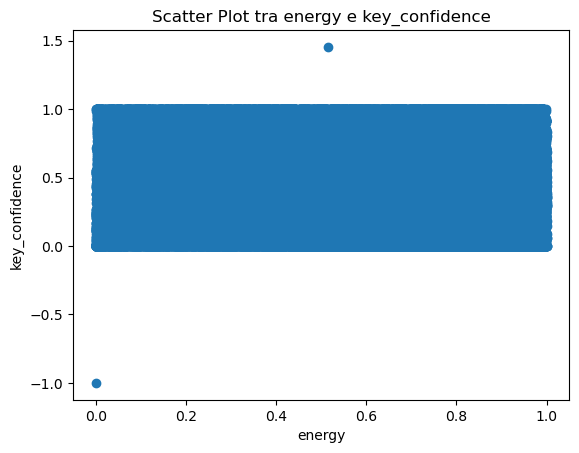

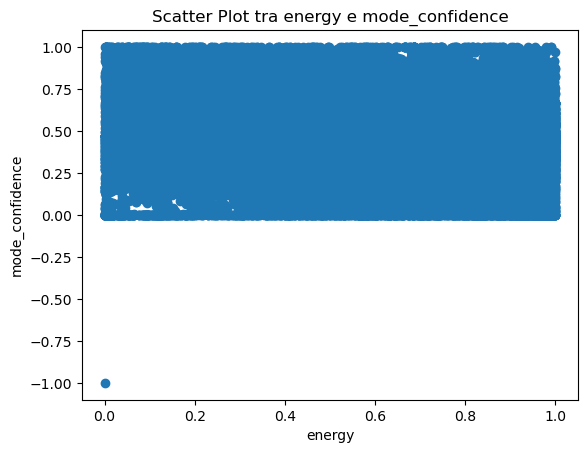

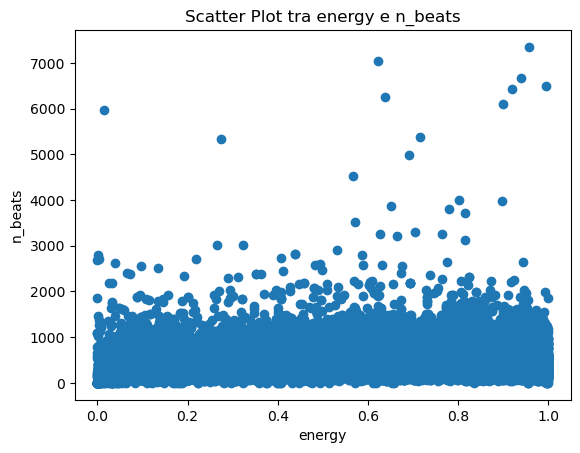

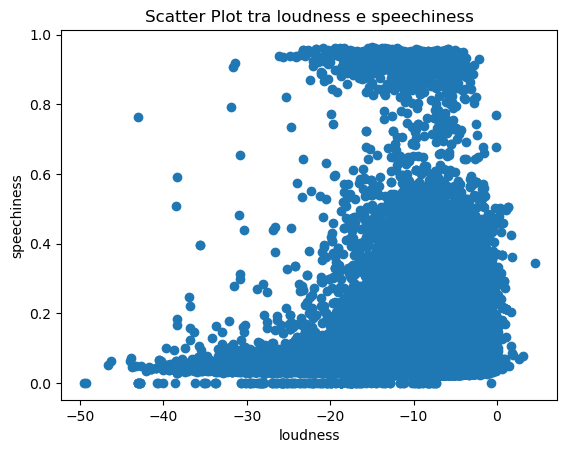

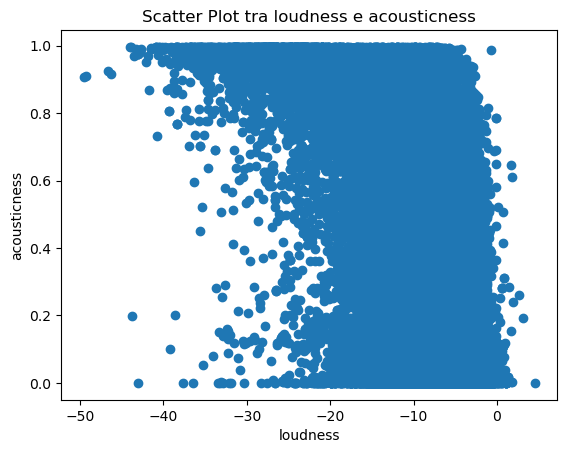

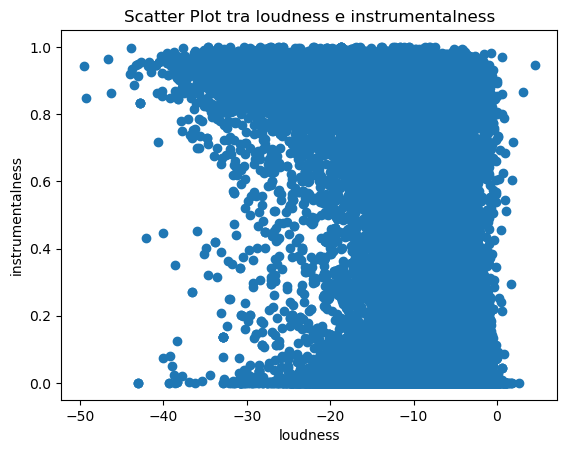

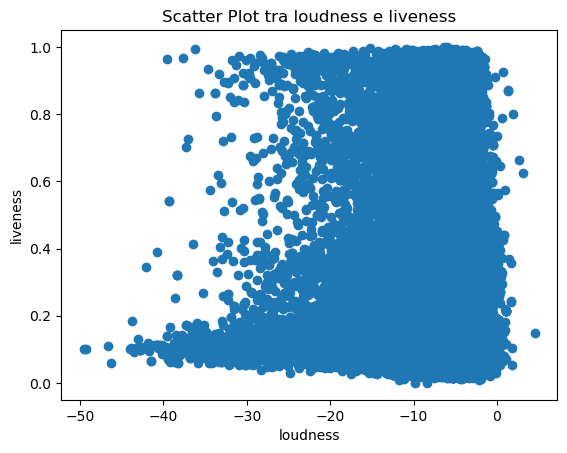

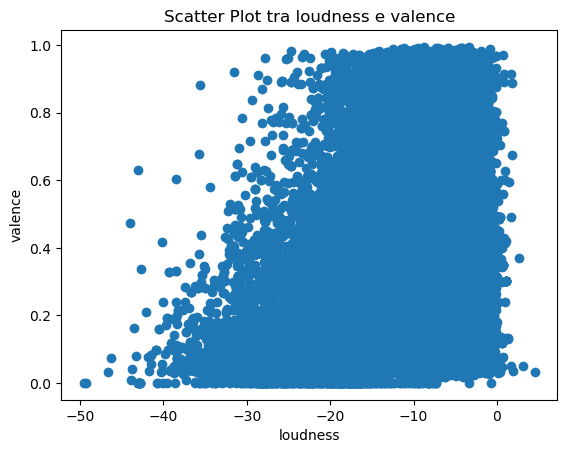

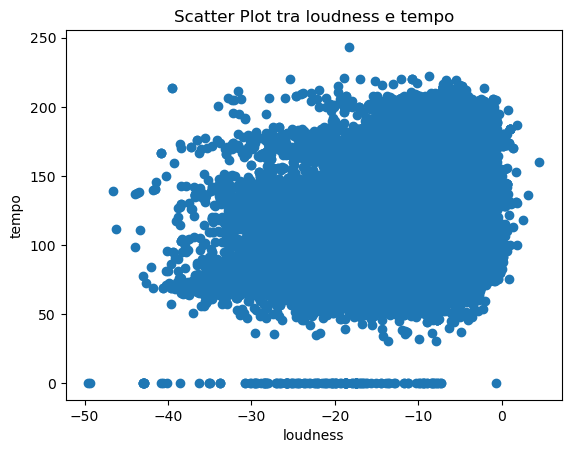

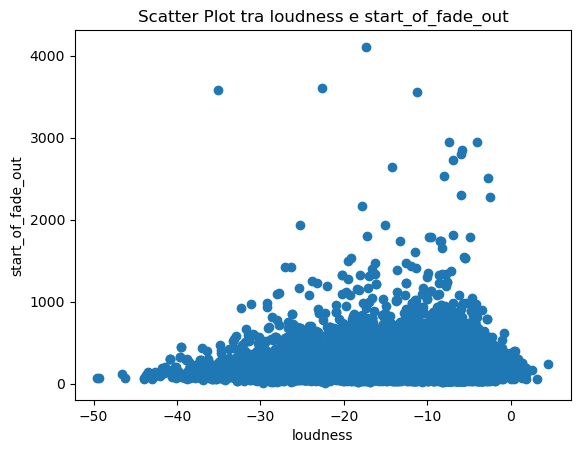

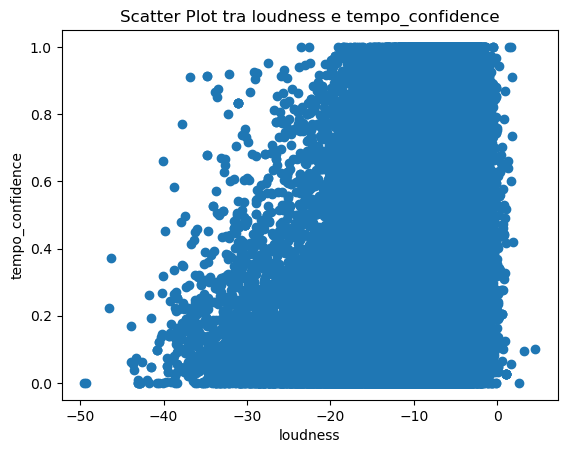

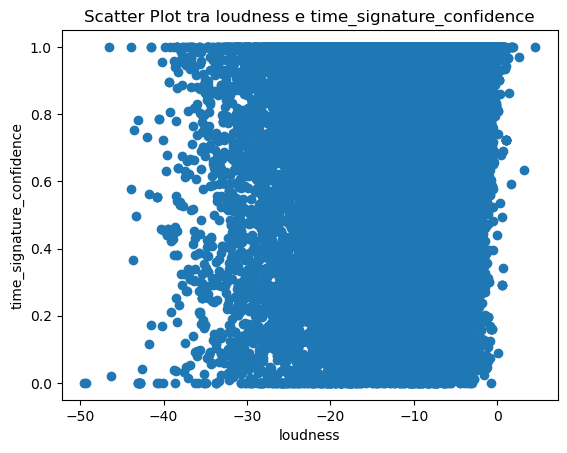

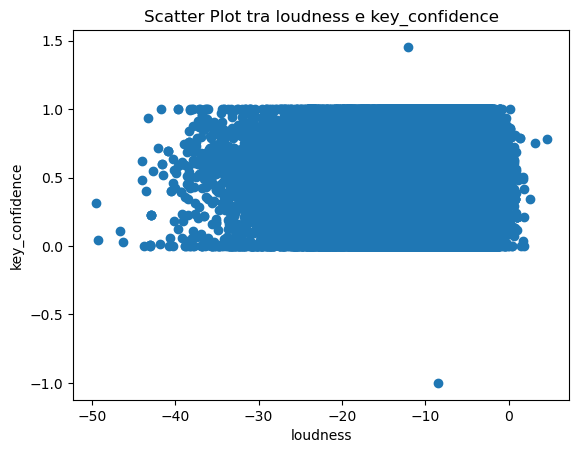

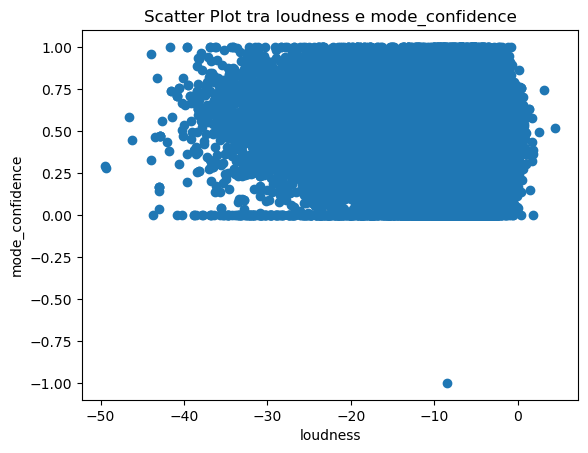

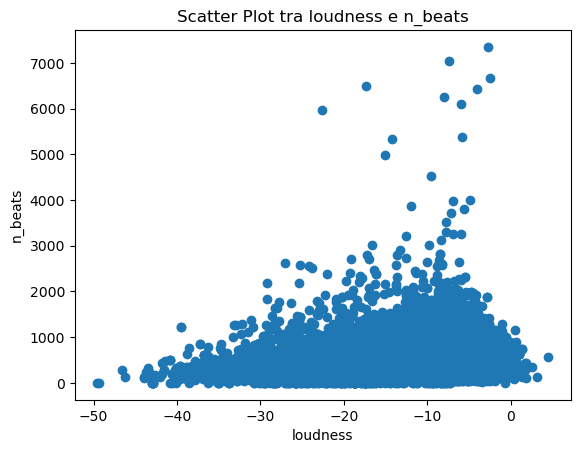

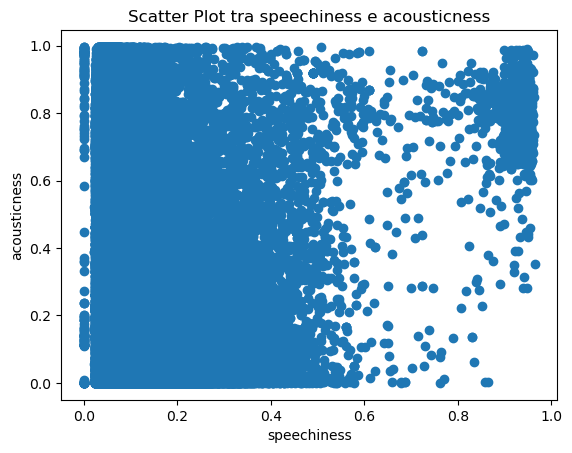

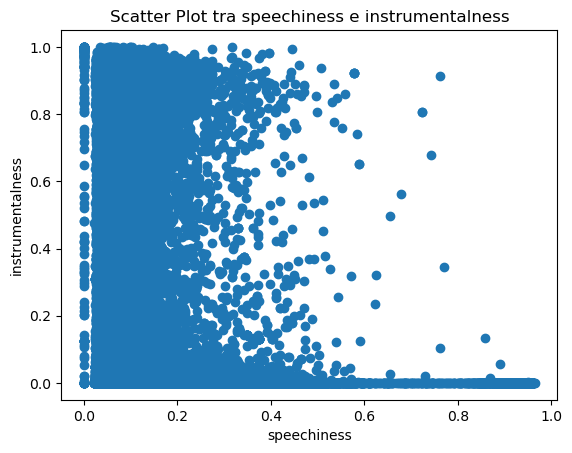

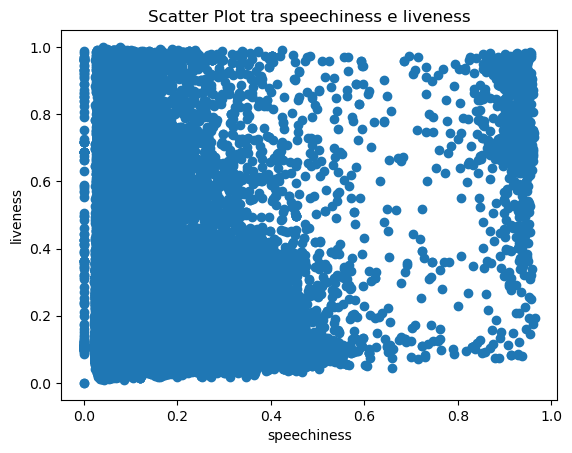

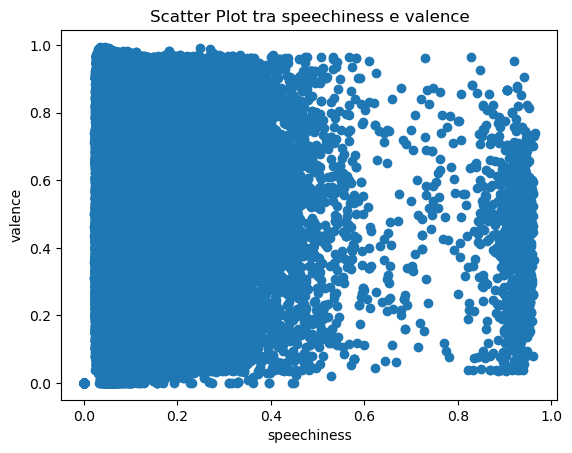

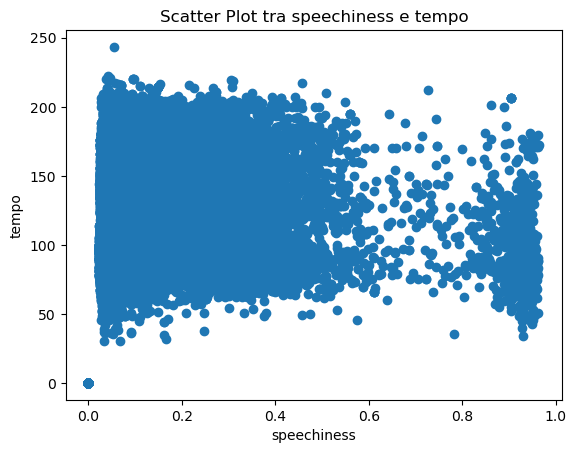

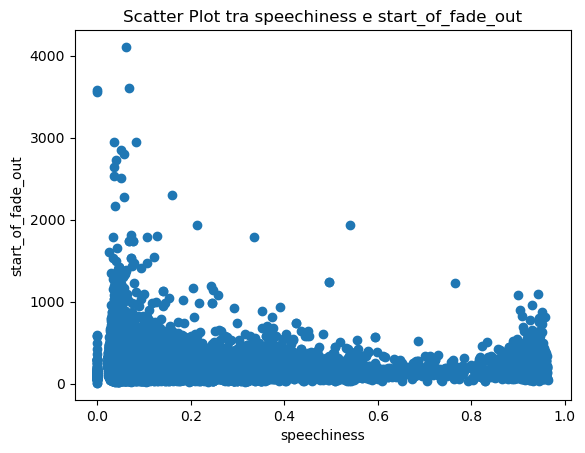

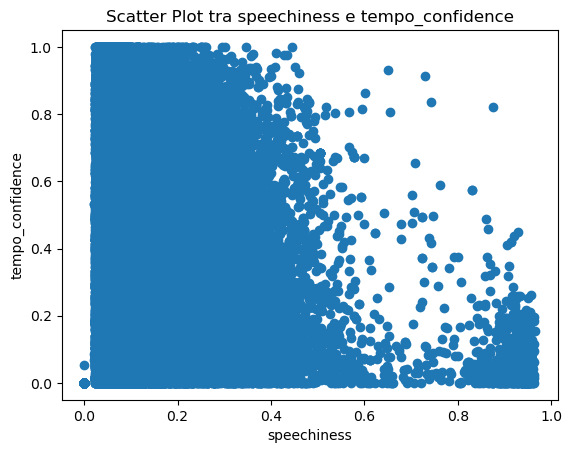

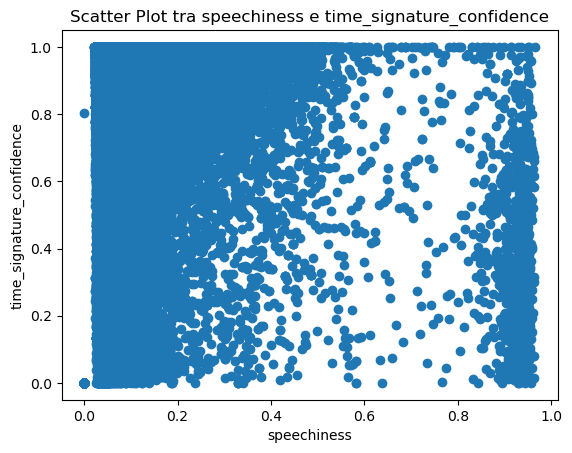

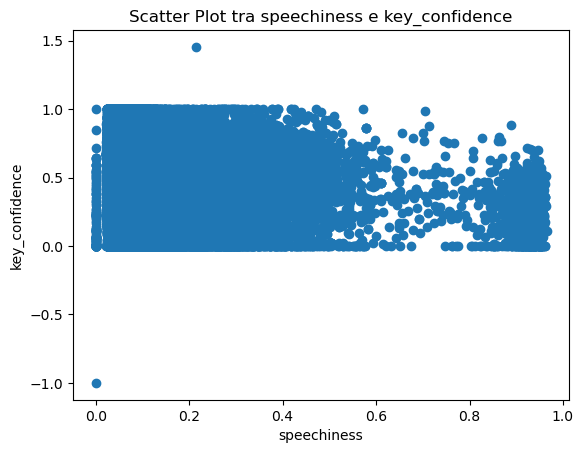

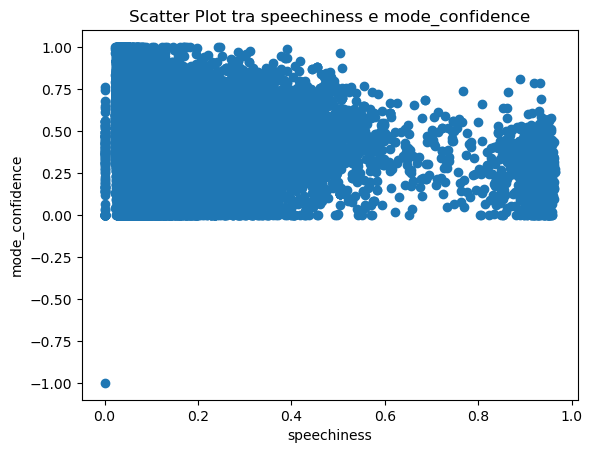

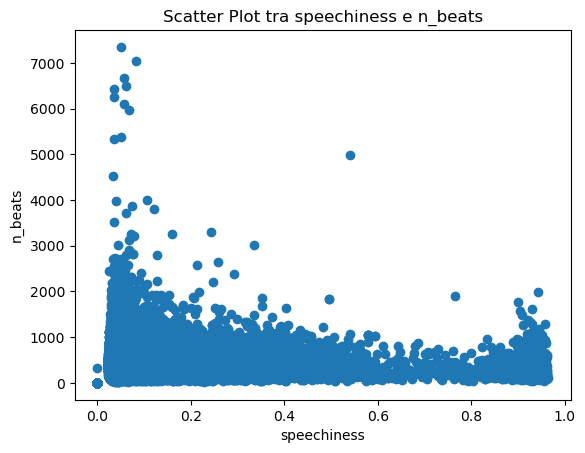

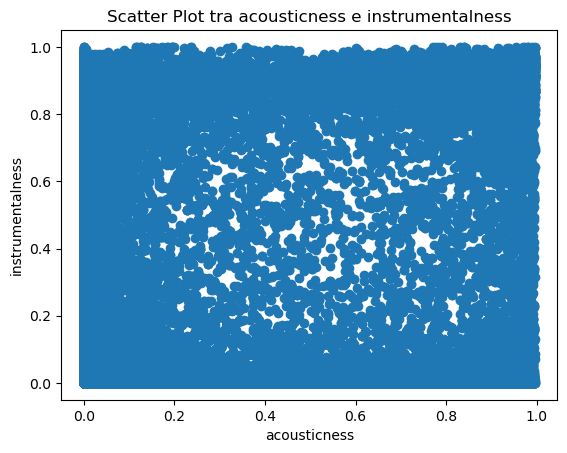

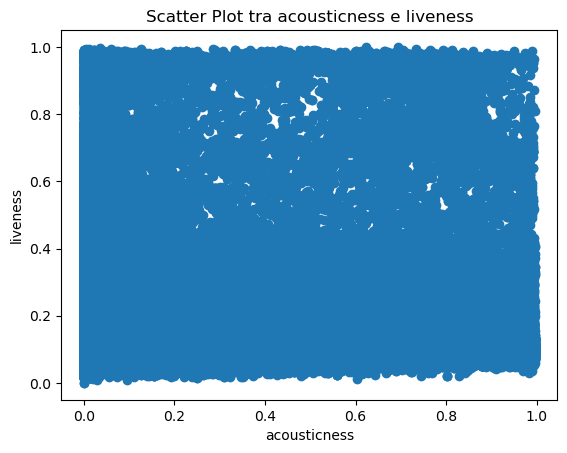

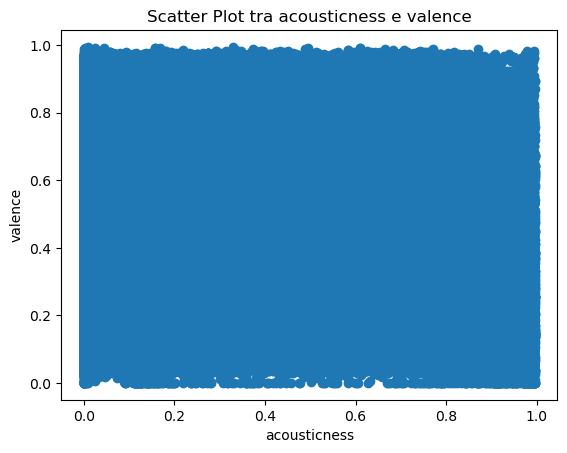

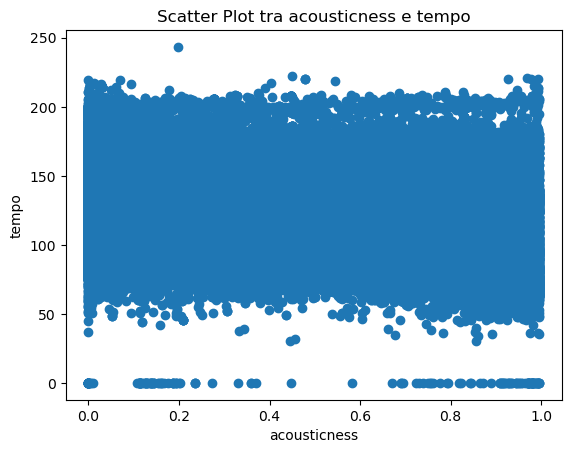

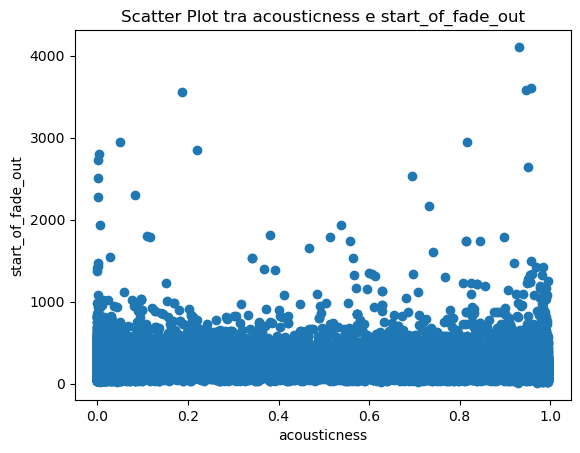

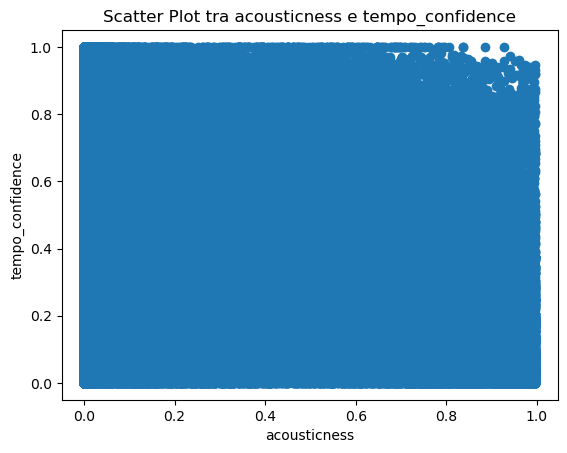

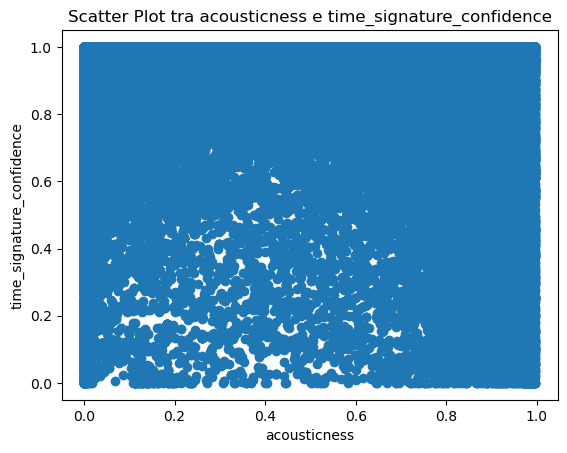

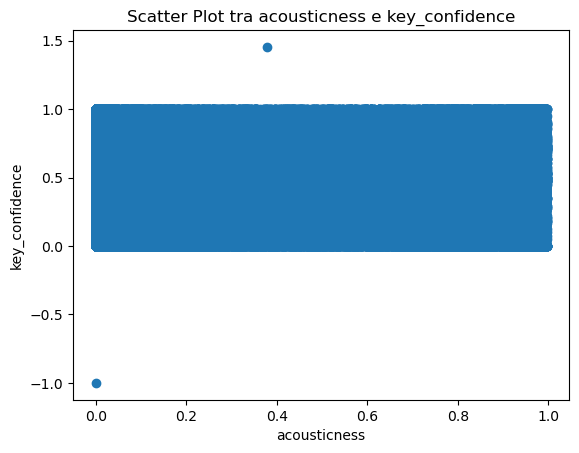

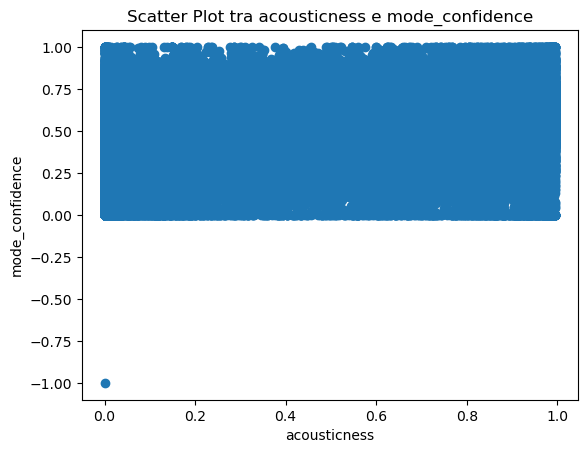

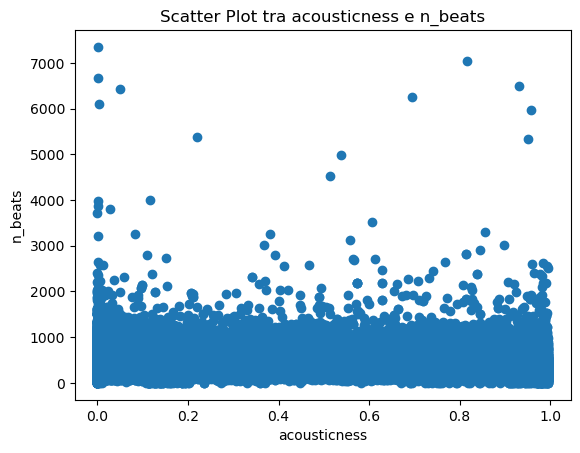

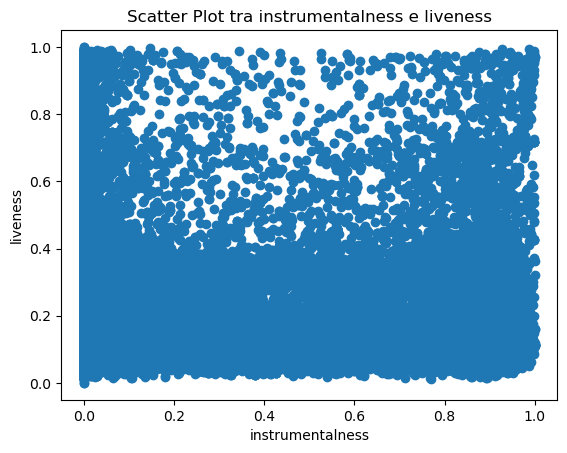

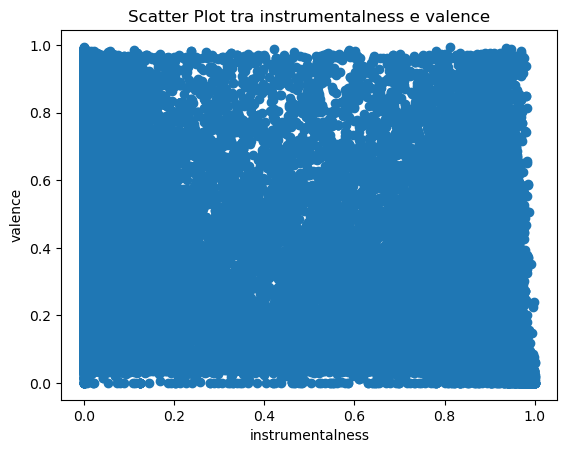

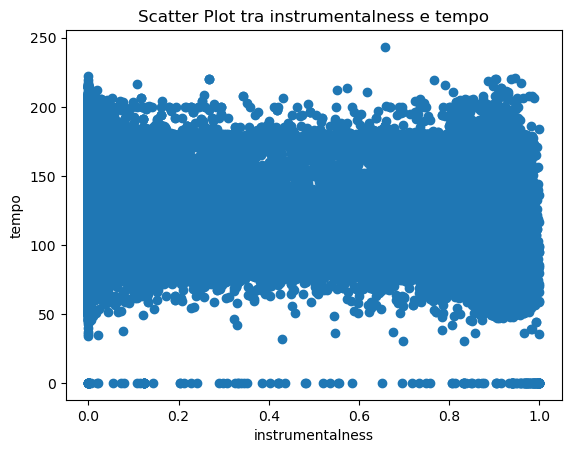

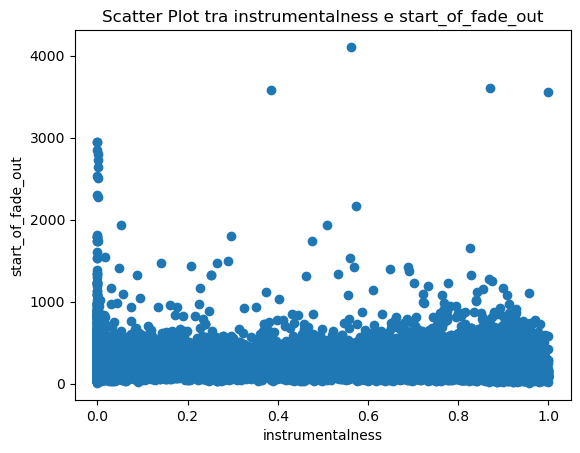

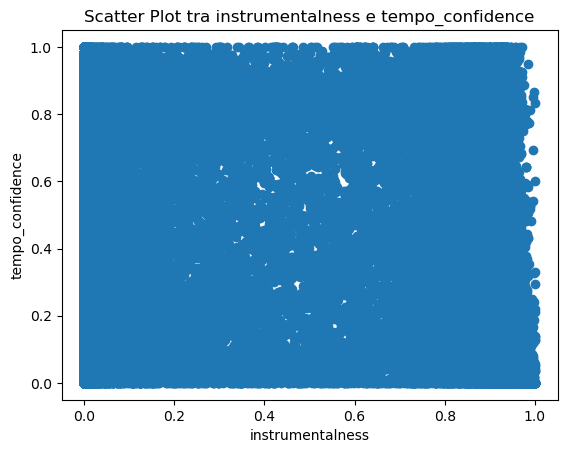

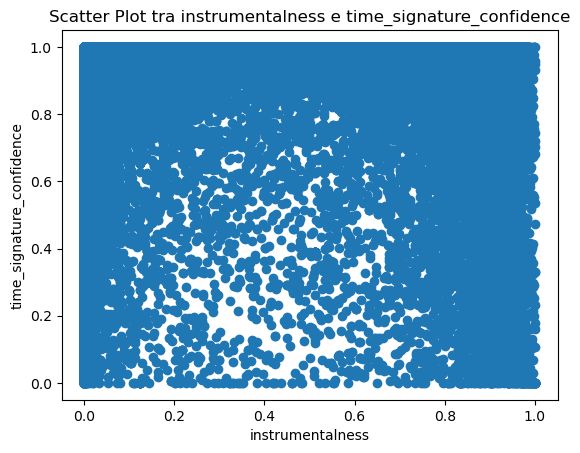

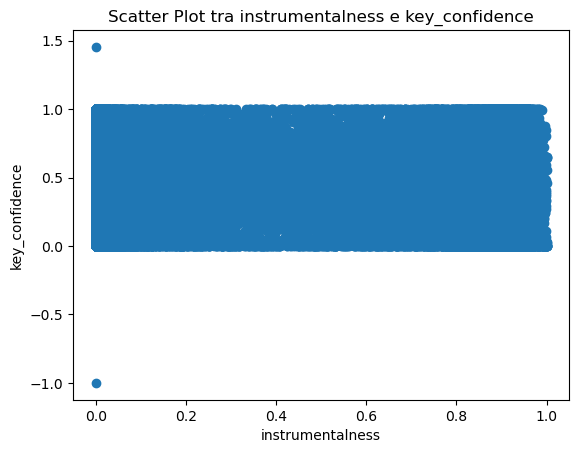

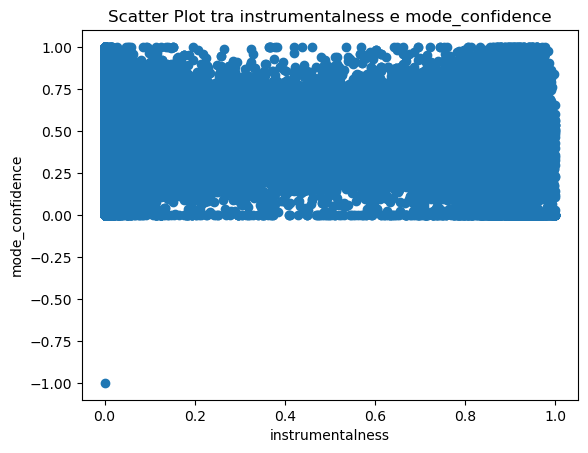

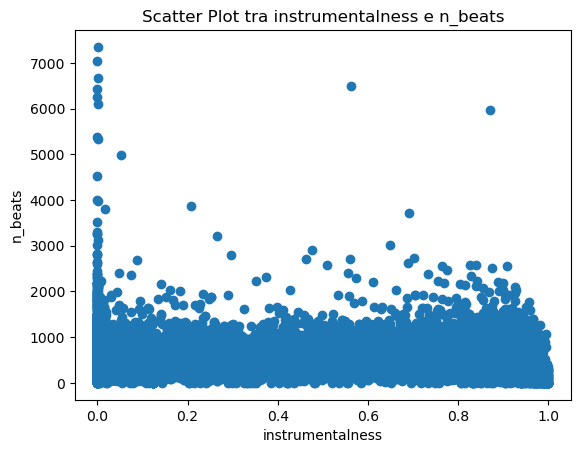

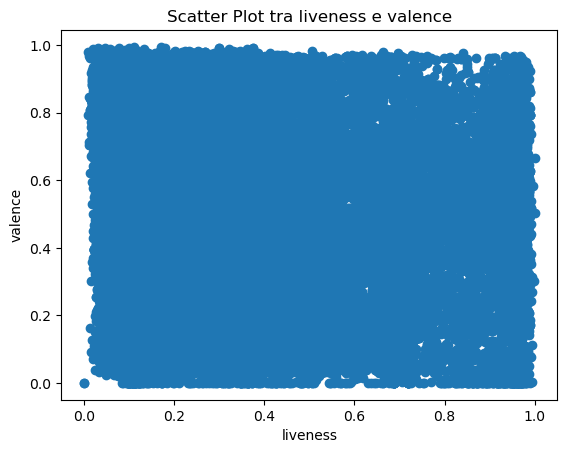

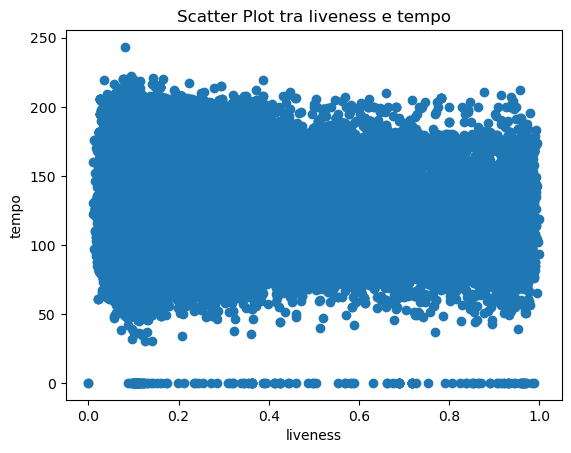

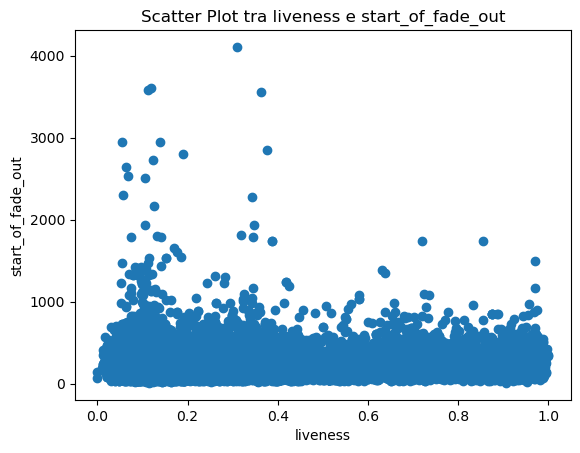

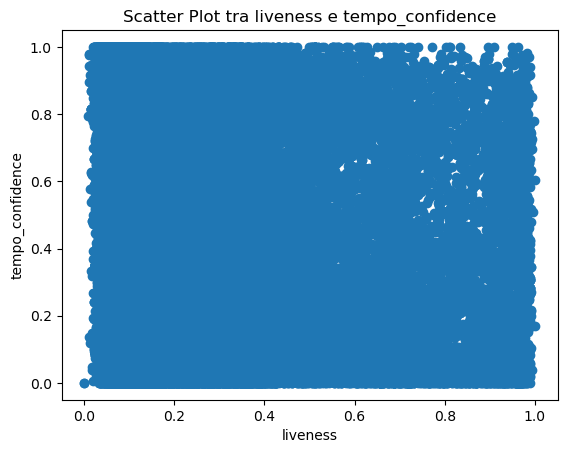

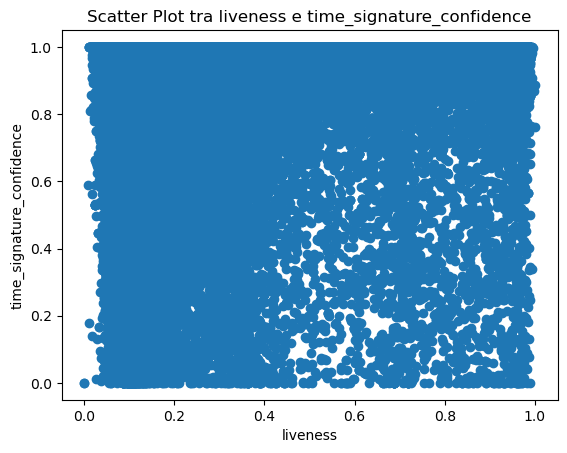

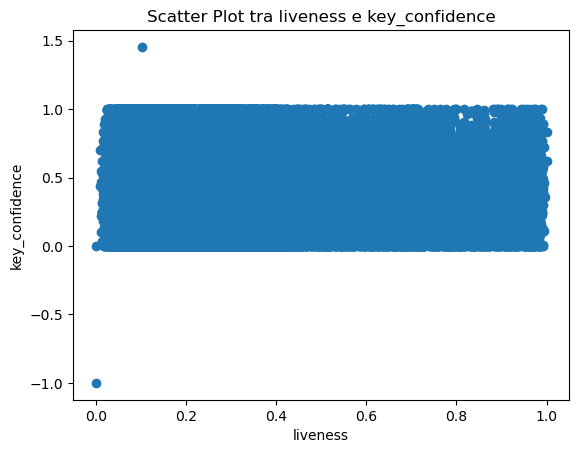

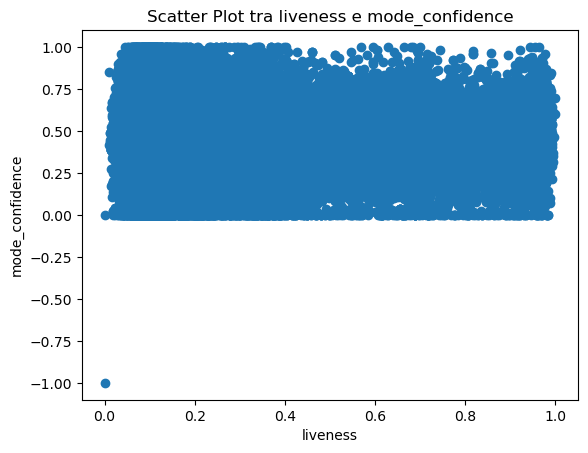

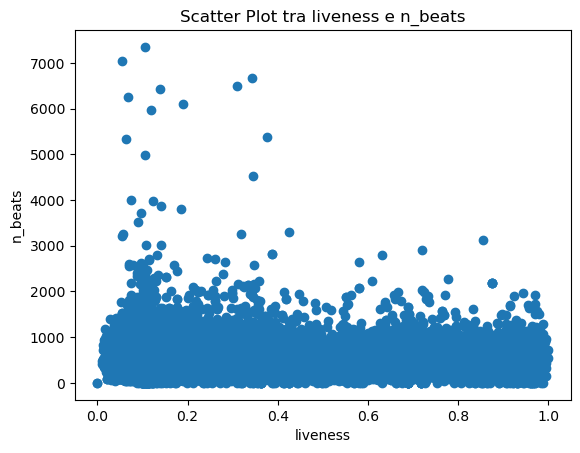

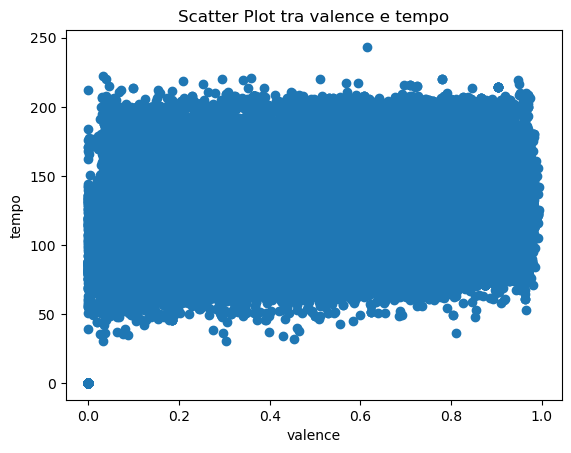

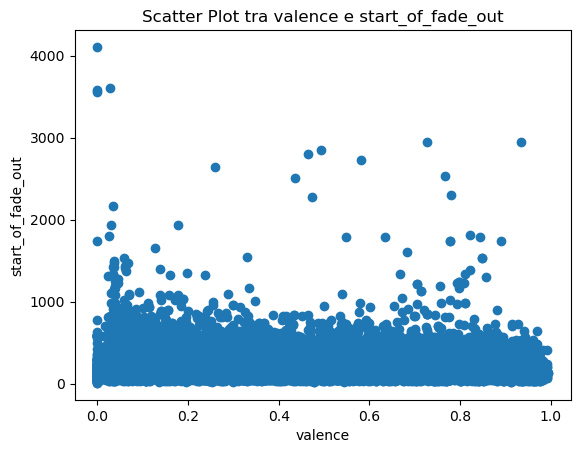

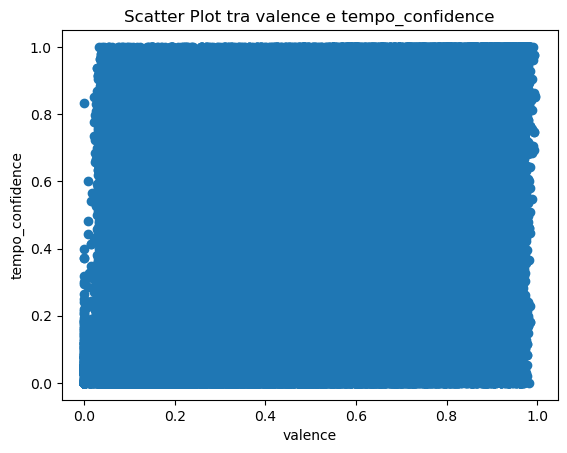

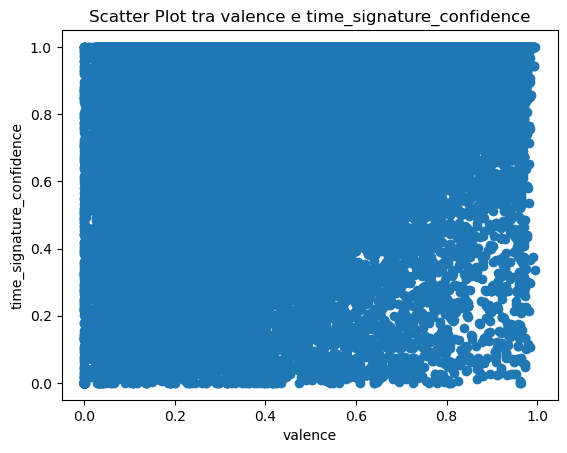

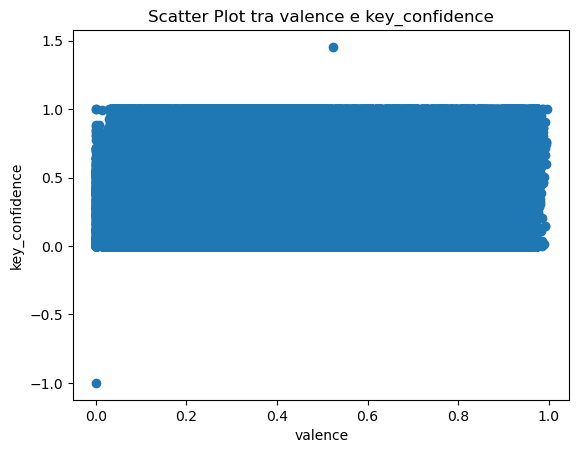

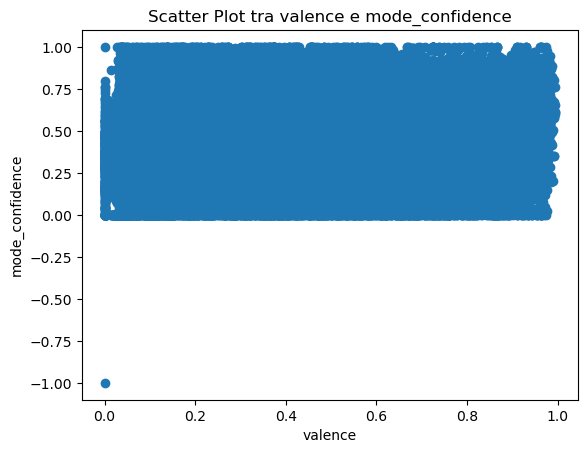

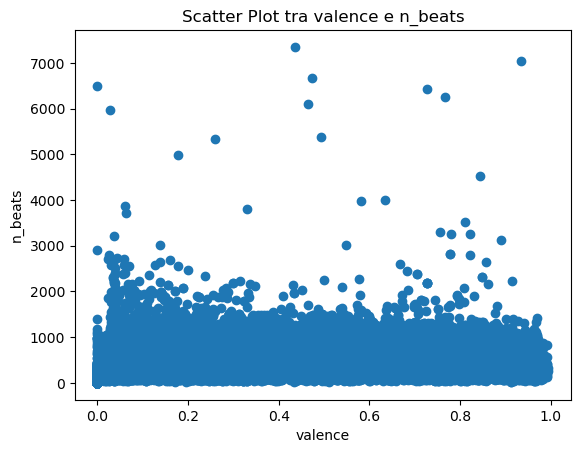

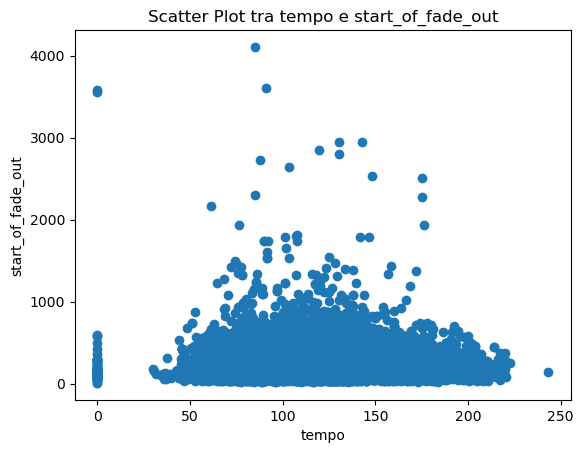

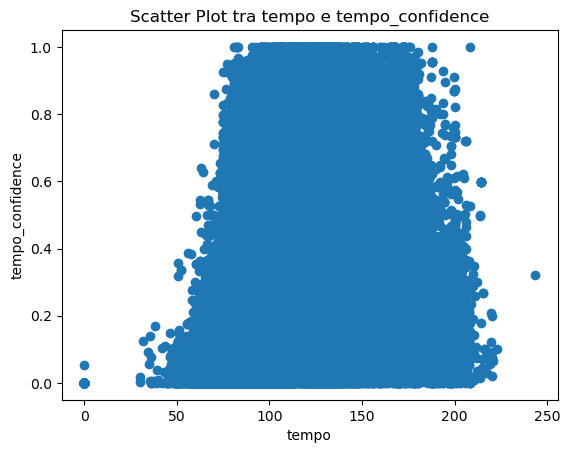

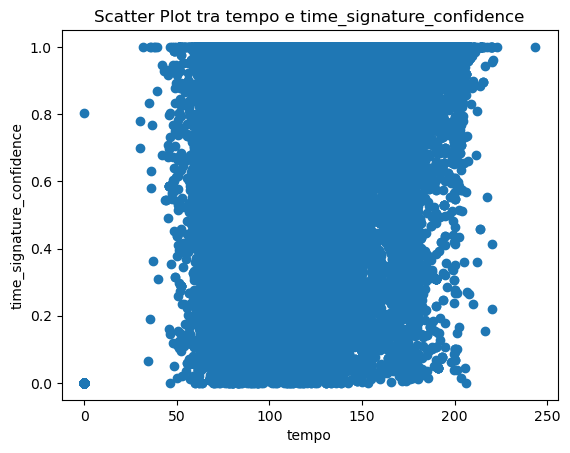

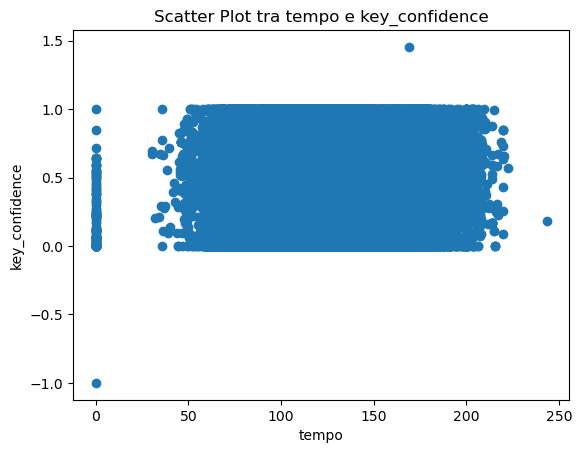

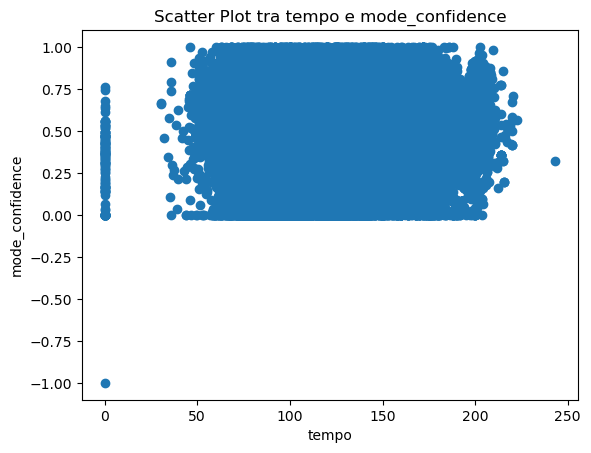

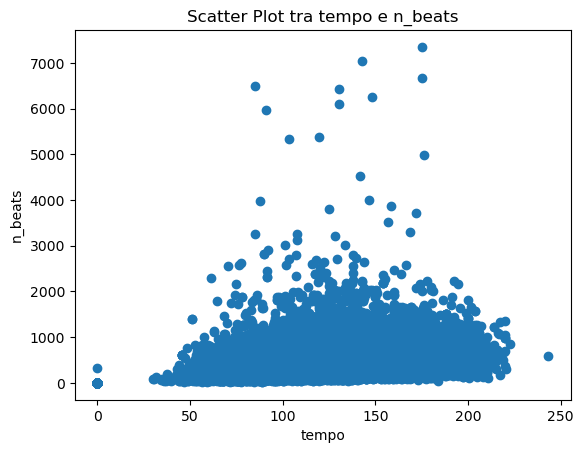

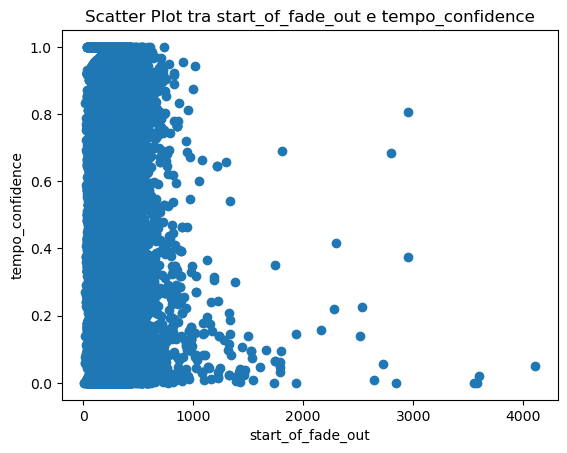

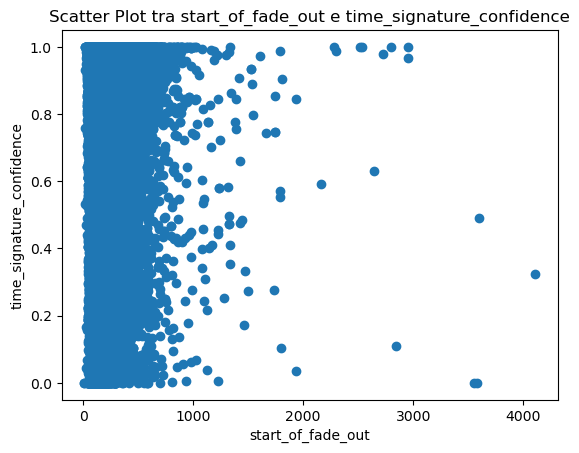

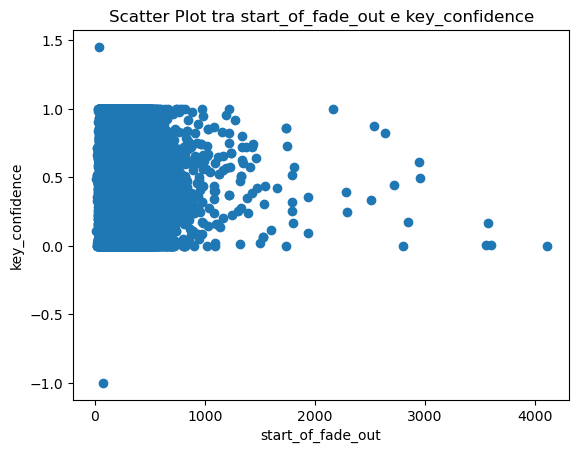

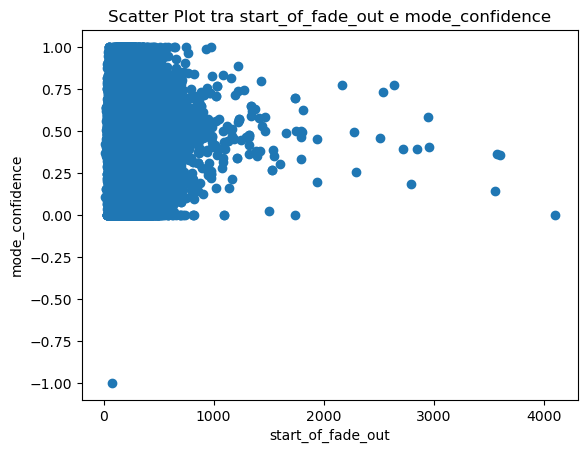

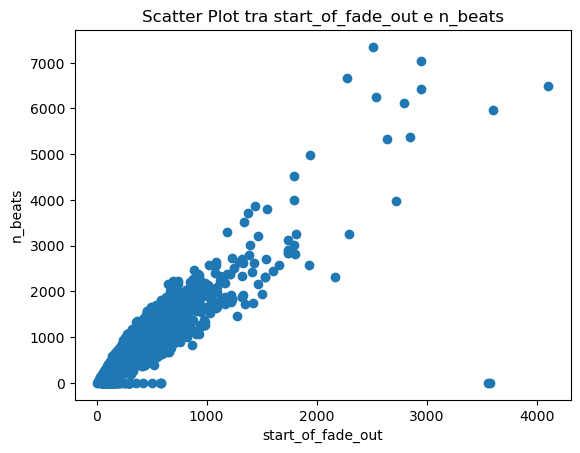

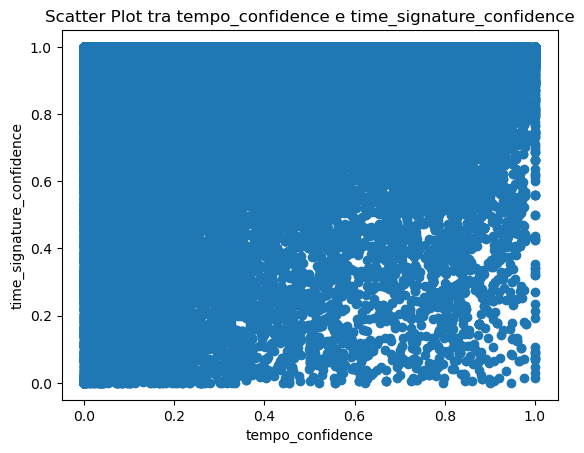

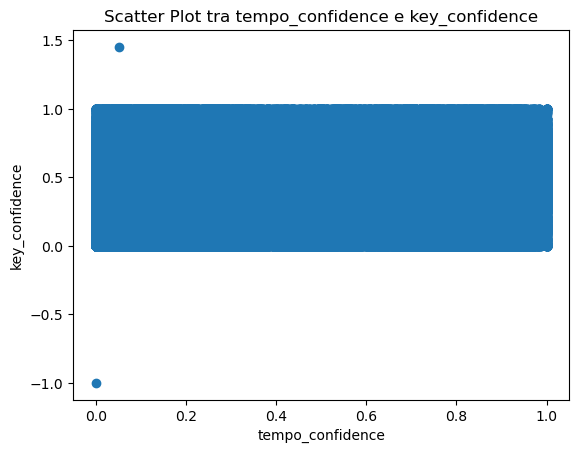

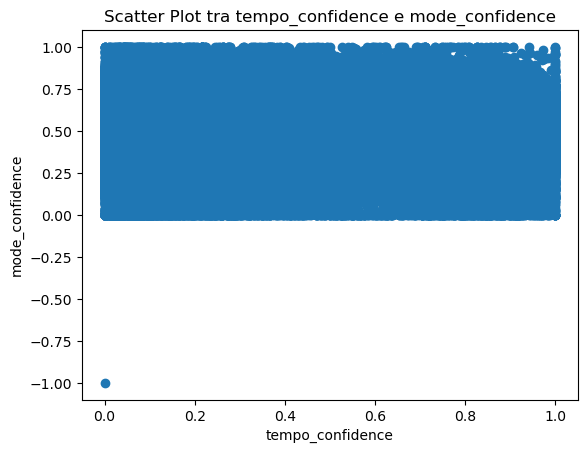

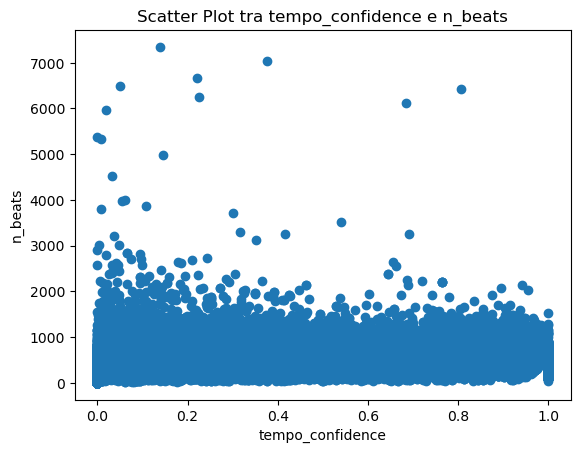

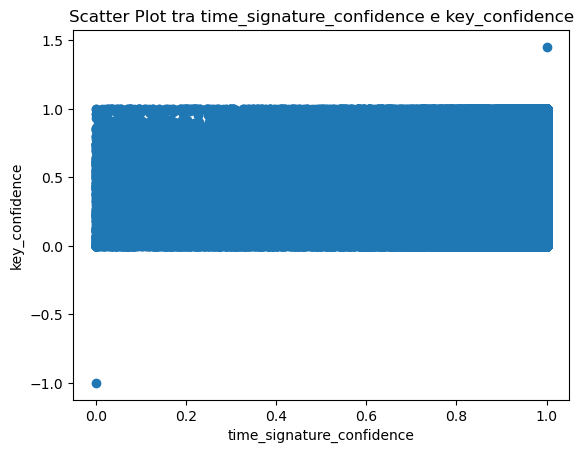

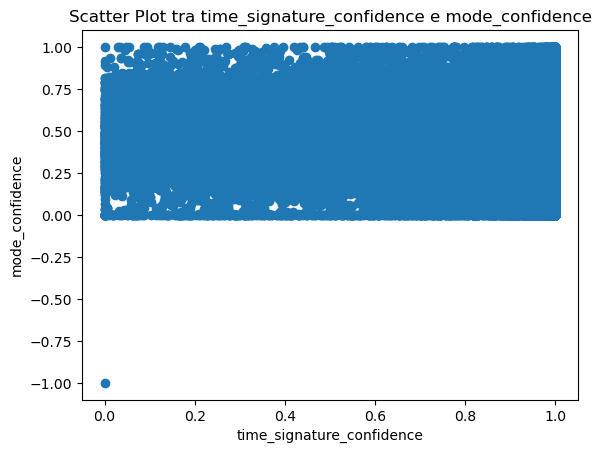

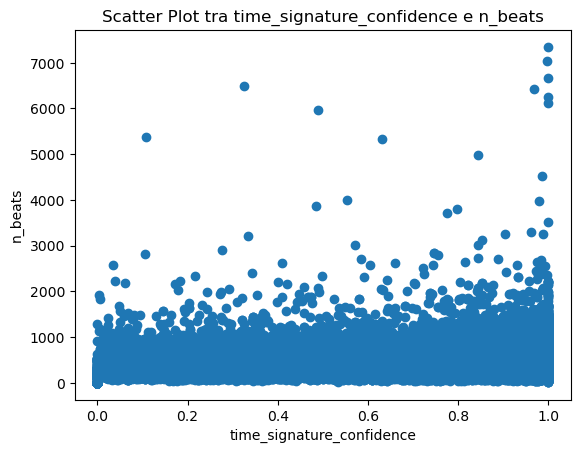

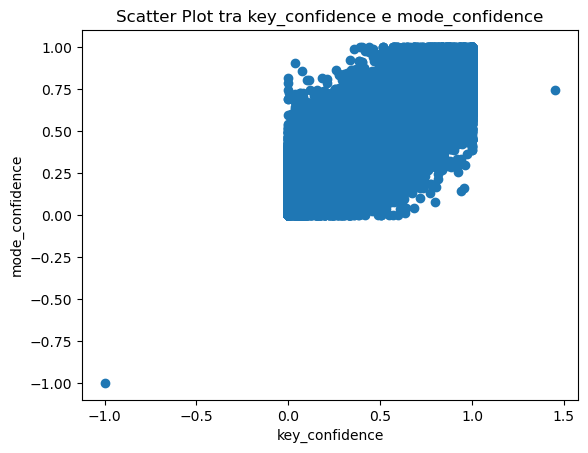

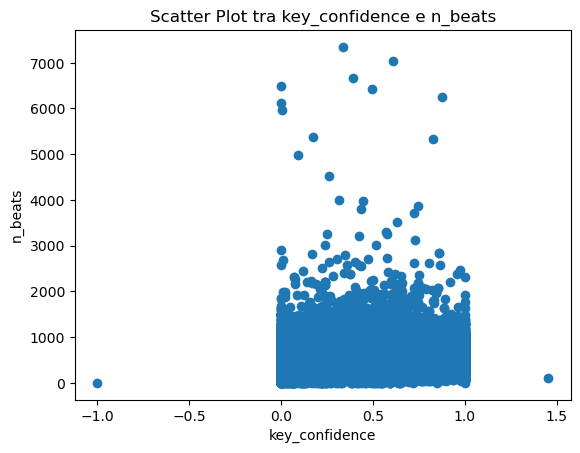

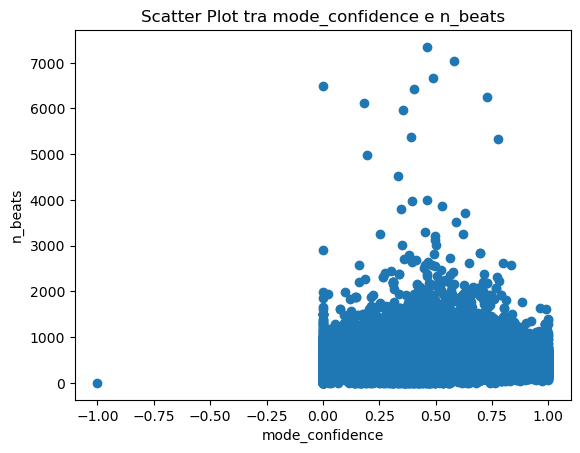

In [26]:
# Definire le variabili da visualizzare
variabili_da_visualizzare = list(df_continui.columns)

# Creare scatter plot per ogni combinazione di variabili
numero_di_variabili = len(variabili_da_visualizzare)

for i in range(numero_di_variabili):
    for j in range(i+1, numero_di_variabili):
        # Creare il plot
        plt.scatter(df_continui[variabili_da_visualizzare[i]], df_continui[variabili_da_visualizzare[j]])
        
        # Aggiungere etichette agli assi
        plt.xlabel(variabili_da_visualizzare[i])
        plt.ylabel(variabili_da_visualizzare[j])
        
        # Aggiungere un titolo
        plt.title(f"Scatter Plot tra {variabili_da_visualizzare[i]} e {variabili_da_visualizzare[j]}")
        
        # Mostrare il plot
        plt.show()

## Heatmap

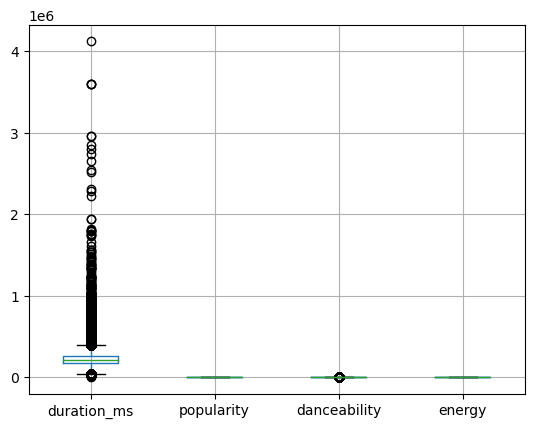

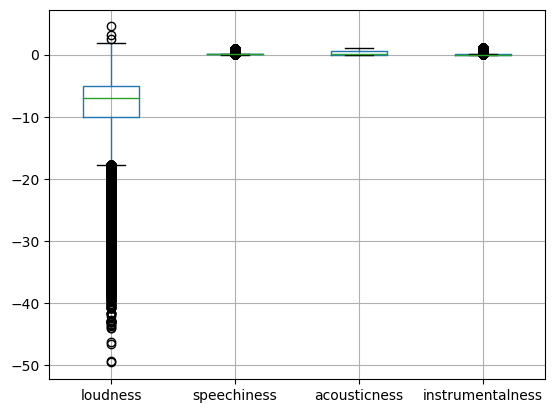

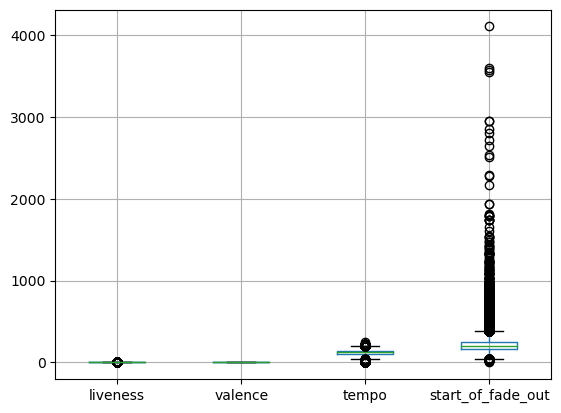

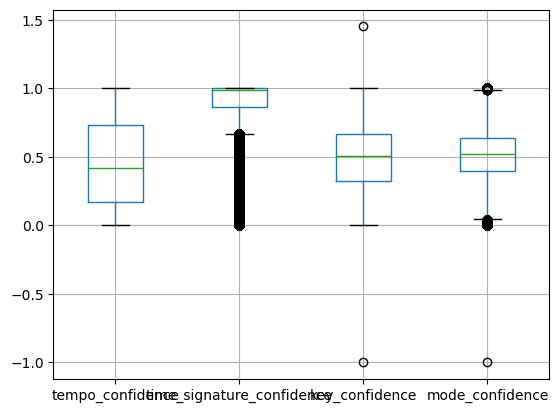

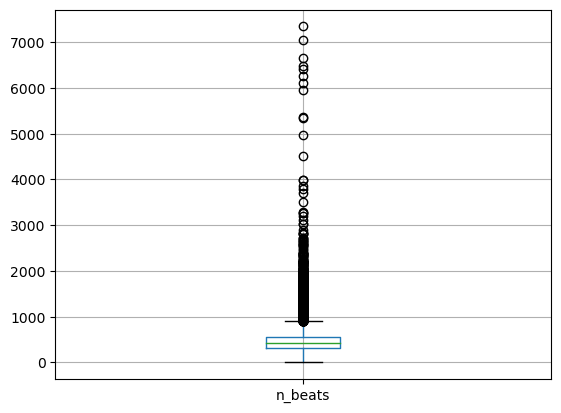

In [27]:
chiavi=df_continui.keys()
for n in range(0, len(chiavi), 4):
    k=chiavi[n:(n+4)]
    sottodf=df_continui[k]
    sottodf.boxplot()
    plt.show()

## Confronto tra i 2 file

In [12]:
df_artist=pd.read_csv('tabular/artists.csv', skipinitialspace=True)

In [13]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                 []  
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                 []  

[30141 rows x 5 columns]

In [14]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0                 1       290479     False          52             5   
1                 1       539229     False          45             5   
2                 1       264200     False          39             5   
3                 1       387413     False           0             6   
4                 1       248956     False           0             1   
...             ...          ...       ...         ...           ...   
109542            1       209655      True          23             2   
109543            1       205724      True          56             1   
109544            1       195853      True          80             3   
109545            1       208698     False          60             1   
109546            1       202826     False          57             5   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... features_duration_ms  \
0                                 1989  ...               290479   
1                              Kiasmos  ...               539229   
2                        Night Visions  ...               264200   
3                   Confronted Remixes  ...               387414   
4                    10 Years Diynamic  ...               248957   
...                                ...  ...                  ...   
109542  I'm Good (Blue) [REAPER Remix]  ...               209655   
109543                End Of The Night  ...               205724   
109544                   One More Love  ...               195853   
109545                        Savannah  ...               208698   
109546                  Champagne Talk  ...               202826   

       time_signature  start_of_fade_out  tempo_confidence  \
0                   3          275.90530             0.020   
1                   4          517.28253             0.678   
2                   3          259.04180             0.847   
3                   4          387.41360             0.882   
4                   4          239.63574             0.882   
...               ...                ...               ...   
109542              4          200.10376             0.729   
109543              4          200.98611             0.712   
109544              4          189.48643             0.814   
109545              4          197.41605             0.650   
109546              4          196.73688             0.428   

   

In [21]:
prima_riga_id_tracks=df['id'].loc[0]

In [22]:
prima_riga_id_tracks

'4rjA5kJJWbwU1prXCvg6Fk'

In [25]:
prima_riga_id_tracks==df_artist[['id']] # non c'è alcun tipo di corrispondenza

id
0      False
1      False
2      False
3      False
4      False
...      ...
30136  False
30137  False
30138  False
30139  False
30140  False

[30141 rows x 1 columns]

In [27]:
df

id                                        name  \
0       4rjA5kJJWbwU1prXCvg6Fk                                        Grey   
1       6xzpUzzIquIyUzTLbbgSdI                                      Thrown   
2       56tXgHlSHCfgmGhwVXNizc                                     Routine   
3       0s3wIBczp6TdSJ2y8cveJl  Confronted - Anfisa Letyago Stranger Remix   
4       4PSbDDd1LRYMhqPXvza6I2                             Jupiter Sunrise   
...                        ...                                         ...   
109542  0wiDjWz3U1WfwXSrWHXe2b     I'm Good (Blue) - REAPER Extended Remix   
109543  46n9OJc7LOIVdj8t2l5WA5                            End Of The Night   
109544  127uq83uGFapbddqiMUKky                     Sexy Bitch (feat. Akon)   
109545  0ZdUHFxifUJNqo7G4aJzoF                                    Savannah   
109546  0M4HcGtxIWVVH4rSNp6XhQ                                      Dejalo   

        disc_number  duration_ms  explicit  popularity  track_number  \
0                 1       290479     False          52             5   
1                 1       539229     False          45             5   
2                 1       264200     False          39             5   
3                 1       387413     False           0             6   
4                 1       248956     False           0             1   
...             ...          ...       ...         ...           ...   
109542            1       209655      True          23             2   
109543            1       205724      True          56             1   
109544            1       195853      True          80             3   
109545            1       208698     False          60             1   
109546            1       202826     False          57             5   

                               artists   album_type  \
0                               Kölsch        album   
1                              Kiasmos        album   
2                      Joris Delacroix        album   
3               Pan-Pot;Anfisa Letyago       single   
4                Kollektiv Turmstrasse  compilation   
...                                ...          ...   
109542  David Guetta;Bebe Rexha;REAPER       single   
109543                     Danny Avila       single   
109544               David Guetta;Akon        album   
109545              Diviners;Philly K.       single   
109546                            King        album   

                            album_name  ... features_duration_ms  \
0                                 1989  ...               290479   
1                              Kiasmos  ...               539229   
2                        Night Visions  ...               264200   
3                   Confronted Remixes  ...               387414   
4                    10 Years Diynamic  ...               248957   
...                                ...  ...                  ...   
109542  I'm Good (Blue) [REAPER Remix]  ...               209655   
109543                End Of The Night  ...               205724   
109544                   One More Love  ...               195853   
109545                        Savannah  ...               208698   
109546                  Champagne Talk  ...               202826   

       time_signature  start_of_fade_out  tempo_confidence  \
0                   3          275.90530             0.020   
1                   4          517.28253             0.678   
2                   3          259.04180             0.847   
3                   4          387.41360             0.882   
4                   4          239.63574             0.882   
...               ...                ...               ...   
109542              4          200.10376             0.729   
109543              4          200.98611             0.712   
109544              4          189.48643             0.814   
109545              4          197.41605             0.650   
109546              4          196.73688             0.428   

   

## Nuovo dataset

In [14]:
df_artist['genres']=df_artist['genres'].values

In [20]:
df_artist['genres']=df_artist['genres'].replace('[]','')

In [21]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                     
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                     

[30141 rows x 5 columns]

In [23]:
df_artist['genres']=df_artist['genres'].dropna()

In [24]:
df_artist

id                      name  popularity  \
0      19slOlozrbxkEIMD8L3Qsv                Fast Eddie        28.0   
1      4BIamAD25vwYldaOWTEsXd                Joe Smooth        38.0   
2      0B9P7RXrukgIdmutz9XMVN  Farley "Jackmaster" Funk        21.0   
3      09xC3MewWz48F1OpYckXTZ                   Jomanda        20.0   
4      0RBnTX5xoVa1bDYt9Qbies                 Floorplan        37.0   
...                       ...                       ...         ...   
30136  2KjxvxgJvbwweNVRMSuIRG                     Hoang        49.0   
30137  6FPDULwgllPquFdqdzj5gi              Robin Hustin        45.0   
30138  7CSAJPH9eLCOvPc9jn1I6e                TobiMorrow        44.0   
30139  22lnnGKlaDxk8sfzCNRJuA                  Diviners        47.0   
30140  1v8lhkt5jZgHT8xi1wYNUS                 Philly K.        38.0   

       followers                                             genres  
0         9904.0  ['acid house', 'chicago house', 'chicago rap',...  
1        13047.0                 ['chicago house', 'classic house']  
2        11933.0   ['acid house', 'chicago house', 'classic house']  
3         4724.0                  ['chicago house', 'garage house']  
4        42515.0  ['chicago house', 'deep house', 'float house',...  
...          ...                                                ...  
30136    22134.0                                                     
30137    14198.0                        ['dutch edm', 'gaming edm']  
30138     2339.0                                       ['sky room']  
30139    74955.0                                     ['gaming edm']  
30140     2152.0                                                     

[30141 rows x 5 columns]

In [43]:
df_artist['popularity'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
30136    False
30137    False
30138    False
30139    False
30140    False
Name: popularity, Length: 30141, dtype: bool

In [35]:
elementi_comuni

0         True
1         True
2         True
3         True
4        False
         ...  
30136    False
30137    False
30138    False
30139    False
30140    False
Name: name, Length: 30141, dtype: bool